# Micro-Credit Defaulter Model Project:

**PROBLEM STATEMENT:**

A Microfinance Institution (MFI) is an organization that offers financial services to low-income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low-income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low-income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

The sample data is provided to us from our client database. It is hereby given to you for this exercise. To improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

**Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.**

# Importing Libraries and loading the Dataset:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

#loading the dataset
df = pd.read_csv('Micro Credit file.csv') 
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Target - Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.So clearly it's a **Classification problem**.

# Exploratory Data Analysis

## 1- Data Exploration

In [2]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


#### We have 2,09,593 rows and 37 columns including target

In [3]:
#checking the shape of dataset
df.shape

(209593, 37)

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

These are the columns in our dataset

## Variable Description:

- label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn : mobile number of user
- aon : age on cellular network in days
- daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 : Average main account balance over last 30 days
- rental90 : Average main account balance over last 90 days
- last_rech_date_ma : Number of days till last recharge of main account
- last_rech_date_da: Number of days till last recharge of data account
- last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30 : Number of times main account got recharged in last 30 days
- fr_ma_rech30 : Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90 : Number of times main account got recharged in last 90 days
- fr_ma_rech90 : Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30 : Number of times data account got recharged in last 30 days
- fr_da_rech30: Frequency of data account recharged in last 30 days
- cnt_da_rech90 : Number of times data account got recharged in last 90 days
- fr_da_rech90 : Frequency of data account recharged in last 90 days
- cnt_loans30 : Number of loans taken by user in last 30 days
- amnt_loans30: Total amount of loans taken by user in last 30 days
- maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
- cnt_loans90 : Number of loans taken by user in last 90 days
- amnt_loans90 : Total amount of loans taken by user in last 90 days
- maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
- payback30 : Average payback time in days over last 30 days
- payback90 : Average payback time in days over last 90 days
- pcircle : telecom circle
- pdate : date

In [5]:
#Checking the data types of all columns
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

I have integer, float and object type data in my dataset.We have 3 object data type. pdate should be a datetime datatype so we have to change it from object to datetime datatype.

In [6]:
#Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

* There is no null values in the dataset.
* 3 Object datatypes

In [7]:
#Checking unique values of each column
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

* Unnamed:0' is all unique numbers and its the index, so we can drop it.
* pcircle has only 1 entry throughout so  we can drop this column. 
* msisdn is a column with phone numbers of users so this column has no contribution on model building.

In [8]:
#Droping Unnamed: 0, msisdn and pcircle column

df = df.drop(["Unnamed: 0"],axis=1)
df = df.drop(["pcircle"],axis=1)
df = df.drop(["msisdn"],axis=1)

In [9]:
#Checking null values in the dataset

df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

There is no null values in our dataset.

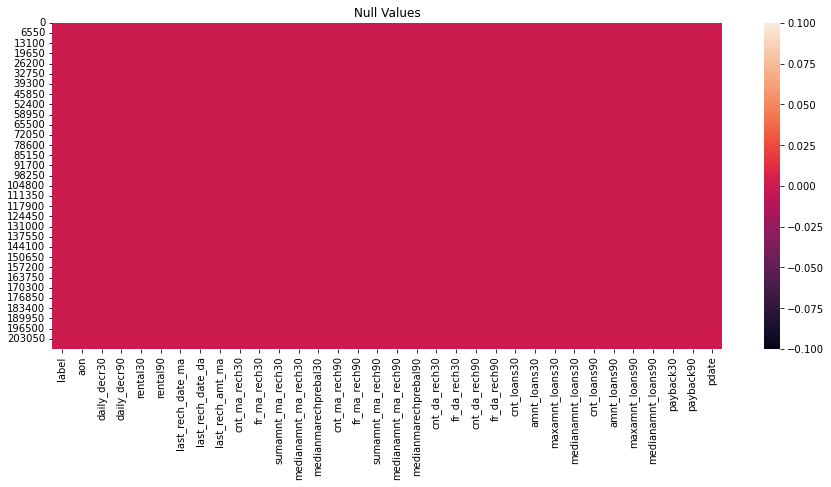

In [10]:
#Visualizeing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is no null values in the dataset.

In [11]:
#Checking for empty observations

df.loc[df['label'] == " "]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate


There is no empty observations in my target column.

## 2. Feature Engineering

In [12]:
#Converting object data type to datetime 

df['pdate'] =  pd.to_datetime(df['pdate'])

In [13]:
#Extracting paid year,month and day from pdate

#Extracting year
df["pyear"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.year

#Extracting month
df["pmonth"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.month

#Extracting day
df["pday"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.day

In [14]:
#Droping pdate column after extraction

df = df.drop(["pdate"],axis=1)

I have successfully extracted day, month and year column from pdate column.

In [15]:
#Checking the value counts of pyear column

df.pyear.value_counts()

2016    209593
Name: pyear, dtype: int64

So in pyear column all the entries are of year 2016, so let's drop it.

In [16]:
#Droping pyear column

df = df.drop(["pyear"],axis=1)

In [17]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pmonth', 'pday'],
      dtype='object')

In [18]:
#Checking the value counts of last_rech_date_da column

df.last_rech_date_da.value_counts()

0.000000         202861
7.000000            163
8.000000            160
11.000000           149
13.000000           148
                  ...  
731116.874493         1
609105.662326         1
945424.253703         1
505559.452693         1
636529.127252         1
Name: last_rech_date_da, Length: 1174, dtype: int64

I have more than 95% zeros in this column. so lets drop it

In [19]:
#Checking the value counts of cnt_da_rech30 column

df.cnt_da_rech30.value_counts()

0.000000        205479
1.000000          2331
2.000000           372
3.000000           156
4.000000            86
                 ...  
13710.643665         1
84844.562846         1
65385.403518         1
93840.663070         1
61002.421345         1
Name: cnt_da_rech30, Length: 1066, dtype: int64

I have 98% zeros in this column.

In [20]:
#Checking the value counts of fr_da_rech30 column

df.fr_da_rech30.value_counts()

0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
                  ...  
757900.530472         1
870976.477512         1
797647.001920         1
519699.885393         1
509386.302670         1
Name: fr_da_rech30, Length: 1072, dtype: int64

I have 99% zeros in this column.

In [21]:
#Checking the value counts of cnt_da_rech90 column

df.cnt_da_rech90.value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
13         6
10         6
16         4
18         3
15         2
20         1
25         1
28         1
30         1
22         1
38         1
19         1
27         1
17         1
Name: cnt_da_rech90, dtype: int64

I have 97% zeros in this column.

In [22]:
#Checking the value counts of fr_da_rech90 column

df.fr_da_rech90.value_counts()

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
14        32
9         32
11        30
12        27
19        22
28        19
15        17
13        17
18        16
29        15
16        14
17        14
25        11
22        11
21        10
20         9
32         8
24         8
27         8
26         7
30         7
31         6
34         5
37         5
23         5
57         3
35         2
41         2
42         1
39         1
33         1
43         1
56         1
46         1
55         1
64         1
Name: fr_da_rech90, dtype: int64

I have 99% zeros in this column.

In [23]:
#Checking the value counts of medianamnt_loans30 column

df.medianamnt_loans30.value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

I have 93% zeros in this column.

In [24]:
#Checking the value counts of medianamnt_loans90 column

df.medianamnt_loans90.value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

I have 94% zeros in this column.

There are more than 90% zeros so they will create skewness in our dataset. So we have to drop these columns.

In [25]:
#Droping columns with more than 90% zeros

df.drop(columns = ['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],inplace = True)

In [26]:
#describing the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000
fr_ma_rech30,209593.0,3737.355121,53643.625172,0.000000,0.000,2.000000,6.00,999606.368132


**Observations:

* Below columns have negative values:
    * aon : age on cellular network in days
    * daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    * daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    * rental30 : Average main account balance over last 30 days
    * rental90 : Average main account balance over last 90 days
    * last_rech_date_ma : Number of days till last recharge of main account 
    * medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    * medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah)

The above columns can not be negative as they are age, account balance and number of days. So we will change them to positive.

* Most of the columns have 0 as the minimum value.
* Mean and Median is different for almost all columns. There is a high chance of skewness present in the dataset in almost all columns.

In [27]:
#Converting all negative values to positive values in above columns

df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['medianmarechprebal30']=abs(df['medianmarechprebal30'])
df['medianmarechprebal90']=abs(df['medianmarechprebal90'])

I have successfully converted all negative values to positive values.

In [28]:
#Checking the value counts of amnt_loans90 column

df.amnt_loans90.value_counts().sort_index()

0       2043
6      69131
12     38908
18     23867
24     17216
       ...  
396        1
402        1
408        4
426        1
438        1
Name: amnt_loans90, Length: 69, dtype: int64

In [29]:
#droping the people who haven't taken any loan

df.drop(df[df['amnt_loans90']==0].index, inplace = True)

Droping people who haven't taken any loans as we don't have any use from them.

In [30]:
#Again Checking description of data set

df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,207550.0,0.873948,0.331908,0.0,1.0000,1.000000,1.0000,1.000000
aon,207550.0,8095.625616,75605.518933,1.0,246.0000,527.000000,982.0000,999860.755168
daily_decr30,207550.0,5352.453575,9208.677568,0.0,41.7600,1414.400000,7200.0000,265926.000000
daily_decr90,207550.0,6044.996776,10902.799534,0.0,41.9835,1443.355000,7723.9975,320630.000000
rental30,207550.0,2697.321812,4258.460653,0.0,299.6900,1088.165000,3334.7500,198926.110000
rental90,207550.0,3477.845090,5698.968928,0.0,326.3400,1332.425000,4167.7625,200148.110000
last_rech_date_ma,207550.0,3744.568567,53813.257533,0.0,1.0000,3.000000,7.0000,998650.377733
last_rech_amt_ma,207550.0,2057.044751,2363.829442,0.0,770.0000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,207550.0,3.991477,4.264318,0.0,1.0000,3.000000,5.0000,203.000000
fr_ma_rech30,207550.0,3728.164201,53603.753070,0.0,0.0000,2.000000,6.0000,999606.368132


Now the statistics of dataset looks good. And these data looks clean now.

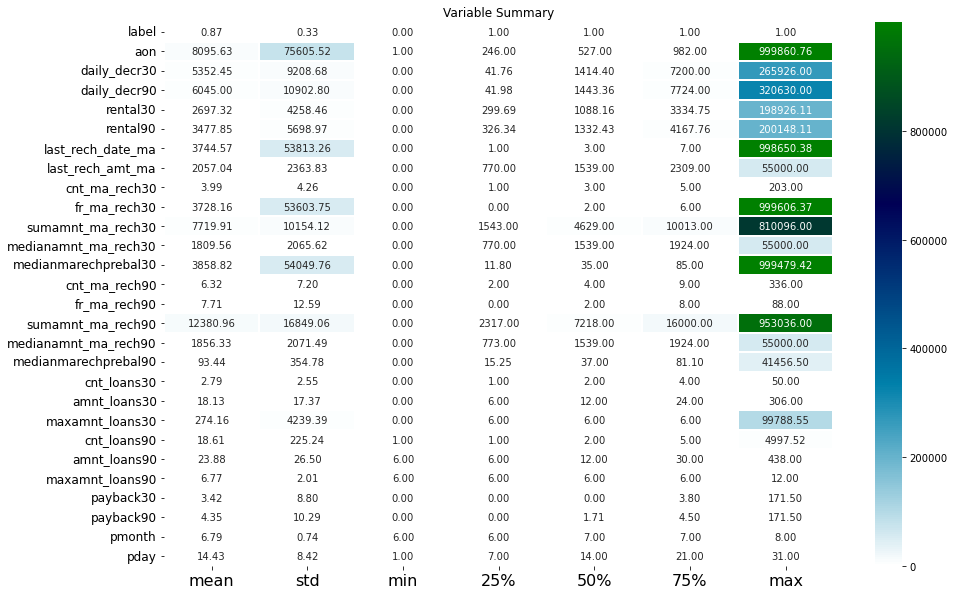

In [31]:
#Heatmap of the Describe function

plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f',cmap='ocean_r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

#### We can see a large variation in Minimum and Maximum value in many columns. There are Outliers present in the dataset.

## 3. Data Visualization

### 3.1 Univariate Analysis

In [32]:
# checking for categorical columns

cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

[]


There is no categorical data in the given dataset.

In [33]:
# Now checking for numerical columns

num_cols=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

Above are the list of numerical columns in the dataset.

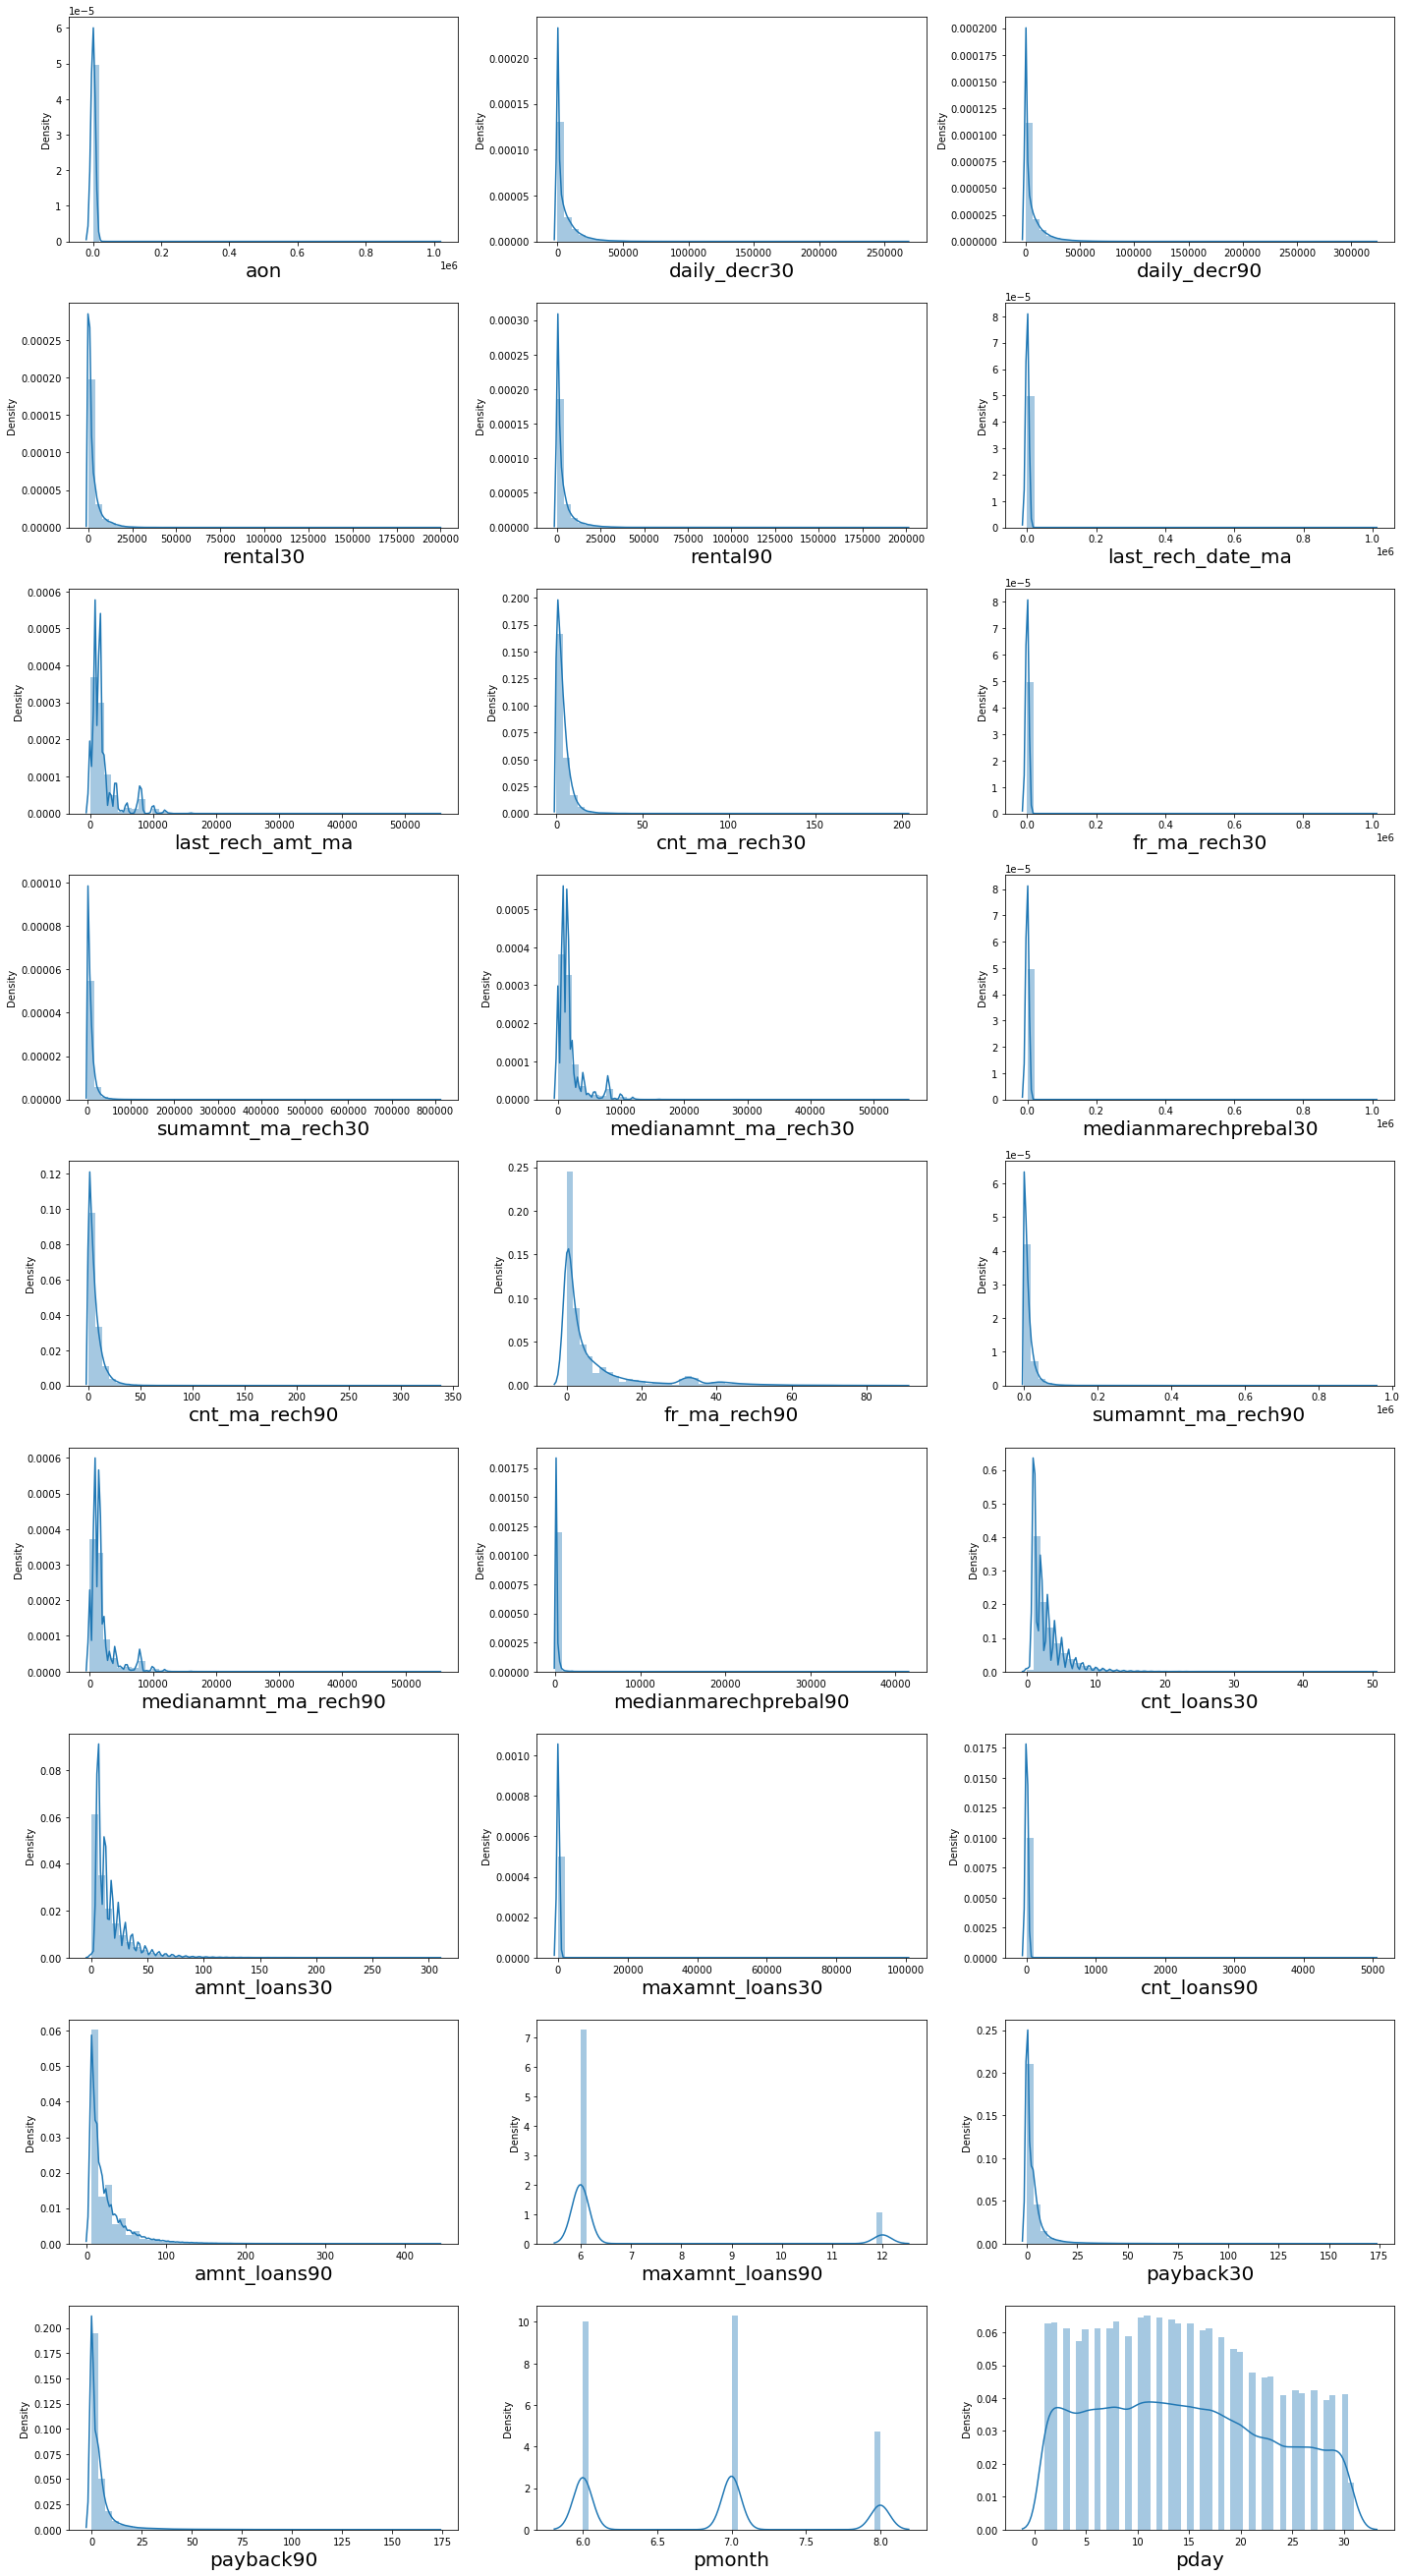

In [34]:
#The distribution of data for numerical columns

plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[num_cols]:
    if plotnumber <=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

**OBSERVATIONS:**
* Almost all columns are right skewed.
* We have symmetrical distribution for the pday and pmonth columns.

<AxesSubplot:xlabel='label', ylabel='count'>

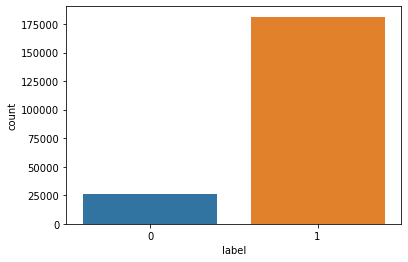

In [35]:
#count plot for target column

sns.countplot(df['label'])

There is a data imbalancing issue so we have to treat this by using SMOTE Technique. 

# Bivariate Analysis:

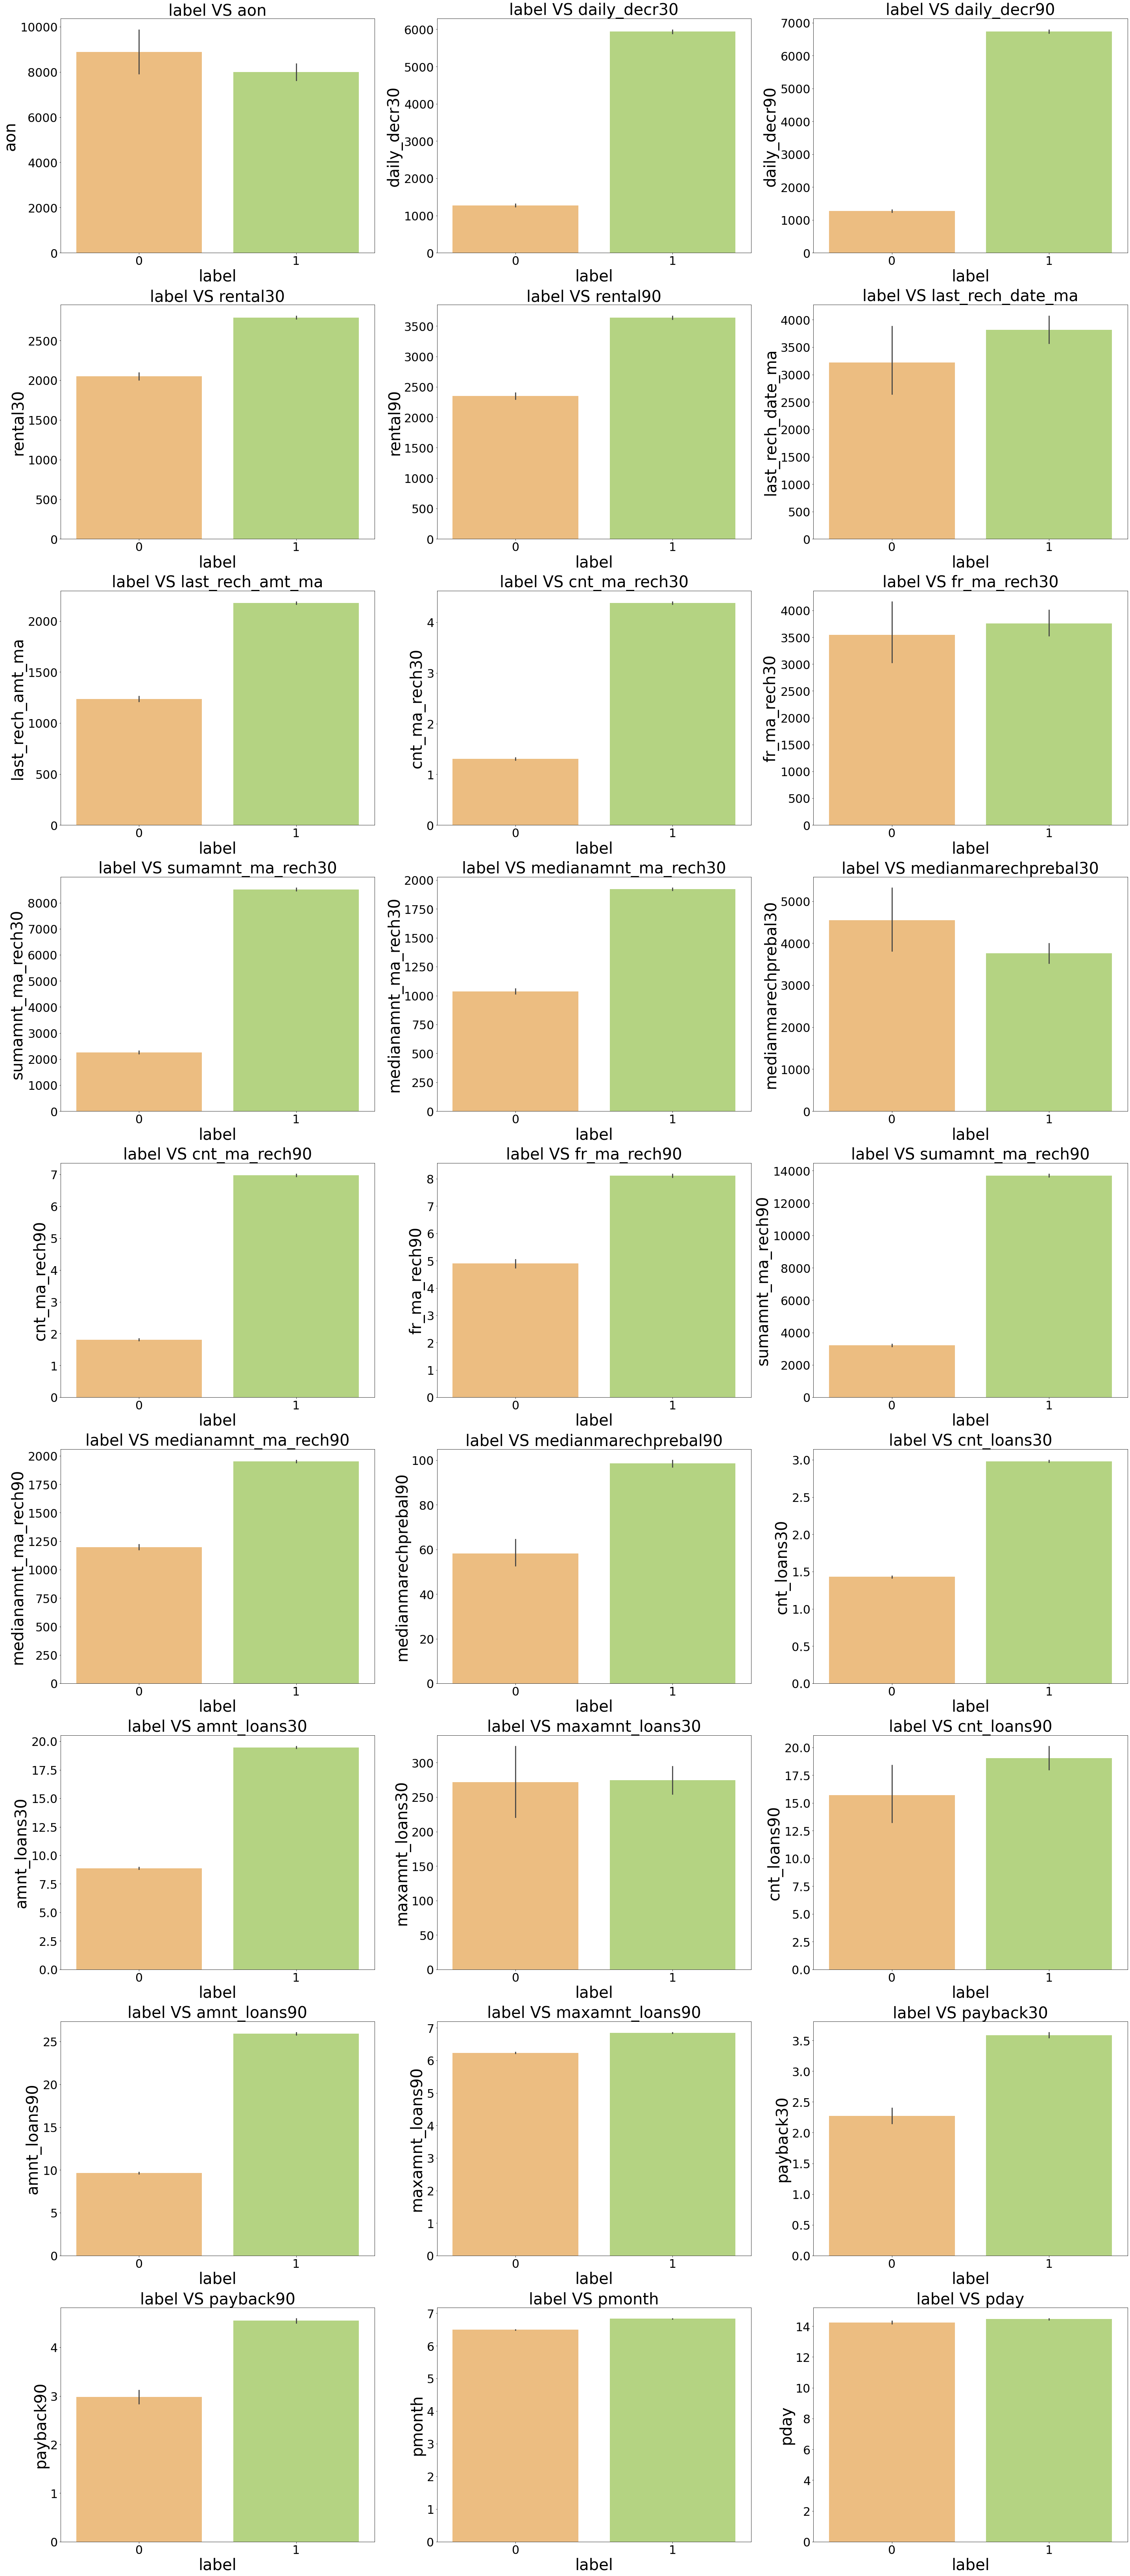

In [36]:
#barplot for numerical columns

plt.figure(figsize=(40,100))
for i in range(len(num_cols)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'], y=df[num_cols[i]], palette="RdYlGn")
    plt.title(f"label VS {num_cols[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(num_cols[i],fontsize = 40)
    plt.tight_layout()

**OBSERVATIONS:**
- 1.Customers with high value of Age on cellular network in days(aon) are maximum defaulters(who have not paid there loan amount-0).
- 2.Customers with high value of Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)(daily_decr30) are maximum Non-defaulters(who have paid there loan amount-1).
- 3.Customers with high value of Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)(daily_decr90) are maximum Non-defaulters(who have paid there loan amount-1).
- 4.Customers with high value of Average main account balance over last 30 days(rental30) are maximum Non-defaulters(who have paid there loan amount-1).
- 5.Customers with high value of Average main account balance over last 90 days(rental90) are maximum Non-defaulters(who have paid there loan amount-1).
- 6.Customers with high Number of days till last recharge of main account(last_rech_date_ma) are maximum Non-defaulters(who have paid there loan amount-1).
- 7.Customers with high value of Amount of last recharge of main account (in Indonesian Rupiah)(last_rech_amt_ma) are maximum Non-defaulters(who have paid there loan amount-1).
- 8.Customers with high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 9.Customers with high value of Frequency of main account recharged in last 30 days(fr_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1) and also the count is high for defaulters comparitively Non-defaulters are more in number.
- 10.Customers with high value of Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)(sumamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 11.Customers with high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 12.Customers with high value of Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)(medianmarechprebal30) are maximum defaulters(who have not paid there loan amount-0).
- 13.Customers with high value of Number of times main account got recharged in last 90 days(cnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 14.Customers with high value of Frequency of main account recharged in last 90 days(fr_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 15.Customers with high value of Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)(sumamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 16.Customers with high value of Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)(medianamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 17.Customers with high value of Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)(medianmarechprebal90) are maximum Non-defaulters(who have paid there loan amount-1).
- 18.Customers with high value of Number of loans taken by user in last 30 days(cnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 19.Customers with high value of Total amount of loans taken by user in last 30 days(amnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 20.Customers with high value of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 21.Customers with high value of Number of loans taken by user in last 90 days(cnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 22.Customers with high value of Total amount of loans taken by user in last 90 days(amnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 23.Customers with high value of maximum amount of loan taken by the user in last 90 days(maxamnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 24.Customers with high value of Average payback time in days over last 30 days(payback30) are maximum Non-defaulters(who have paid there loan amount-1).
- 25.Customers with high value of Average payback time in days over last 90 days(payback90) are maximum Non-defaulters(who have paid there loan amount-1).
- 26.In between 6th and 7th month maximum customers both defualters and Non-defaulters have paid there loan amount.
- 27.Below 14th of each month all the customers have paid there loan amount.

In [38]:
num_cols1=['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90']
num_cols2=['sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'payback30',
 'payback90',
 'pmonth',
 'pday']

IndexError: list index out of range

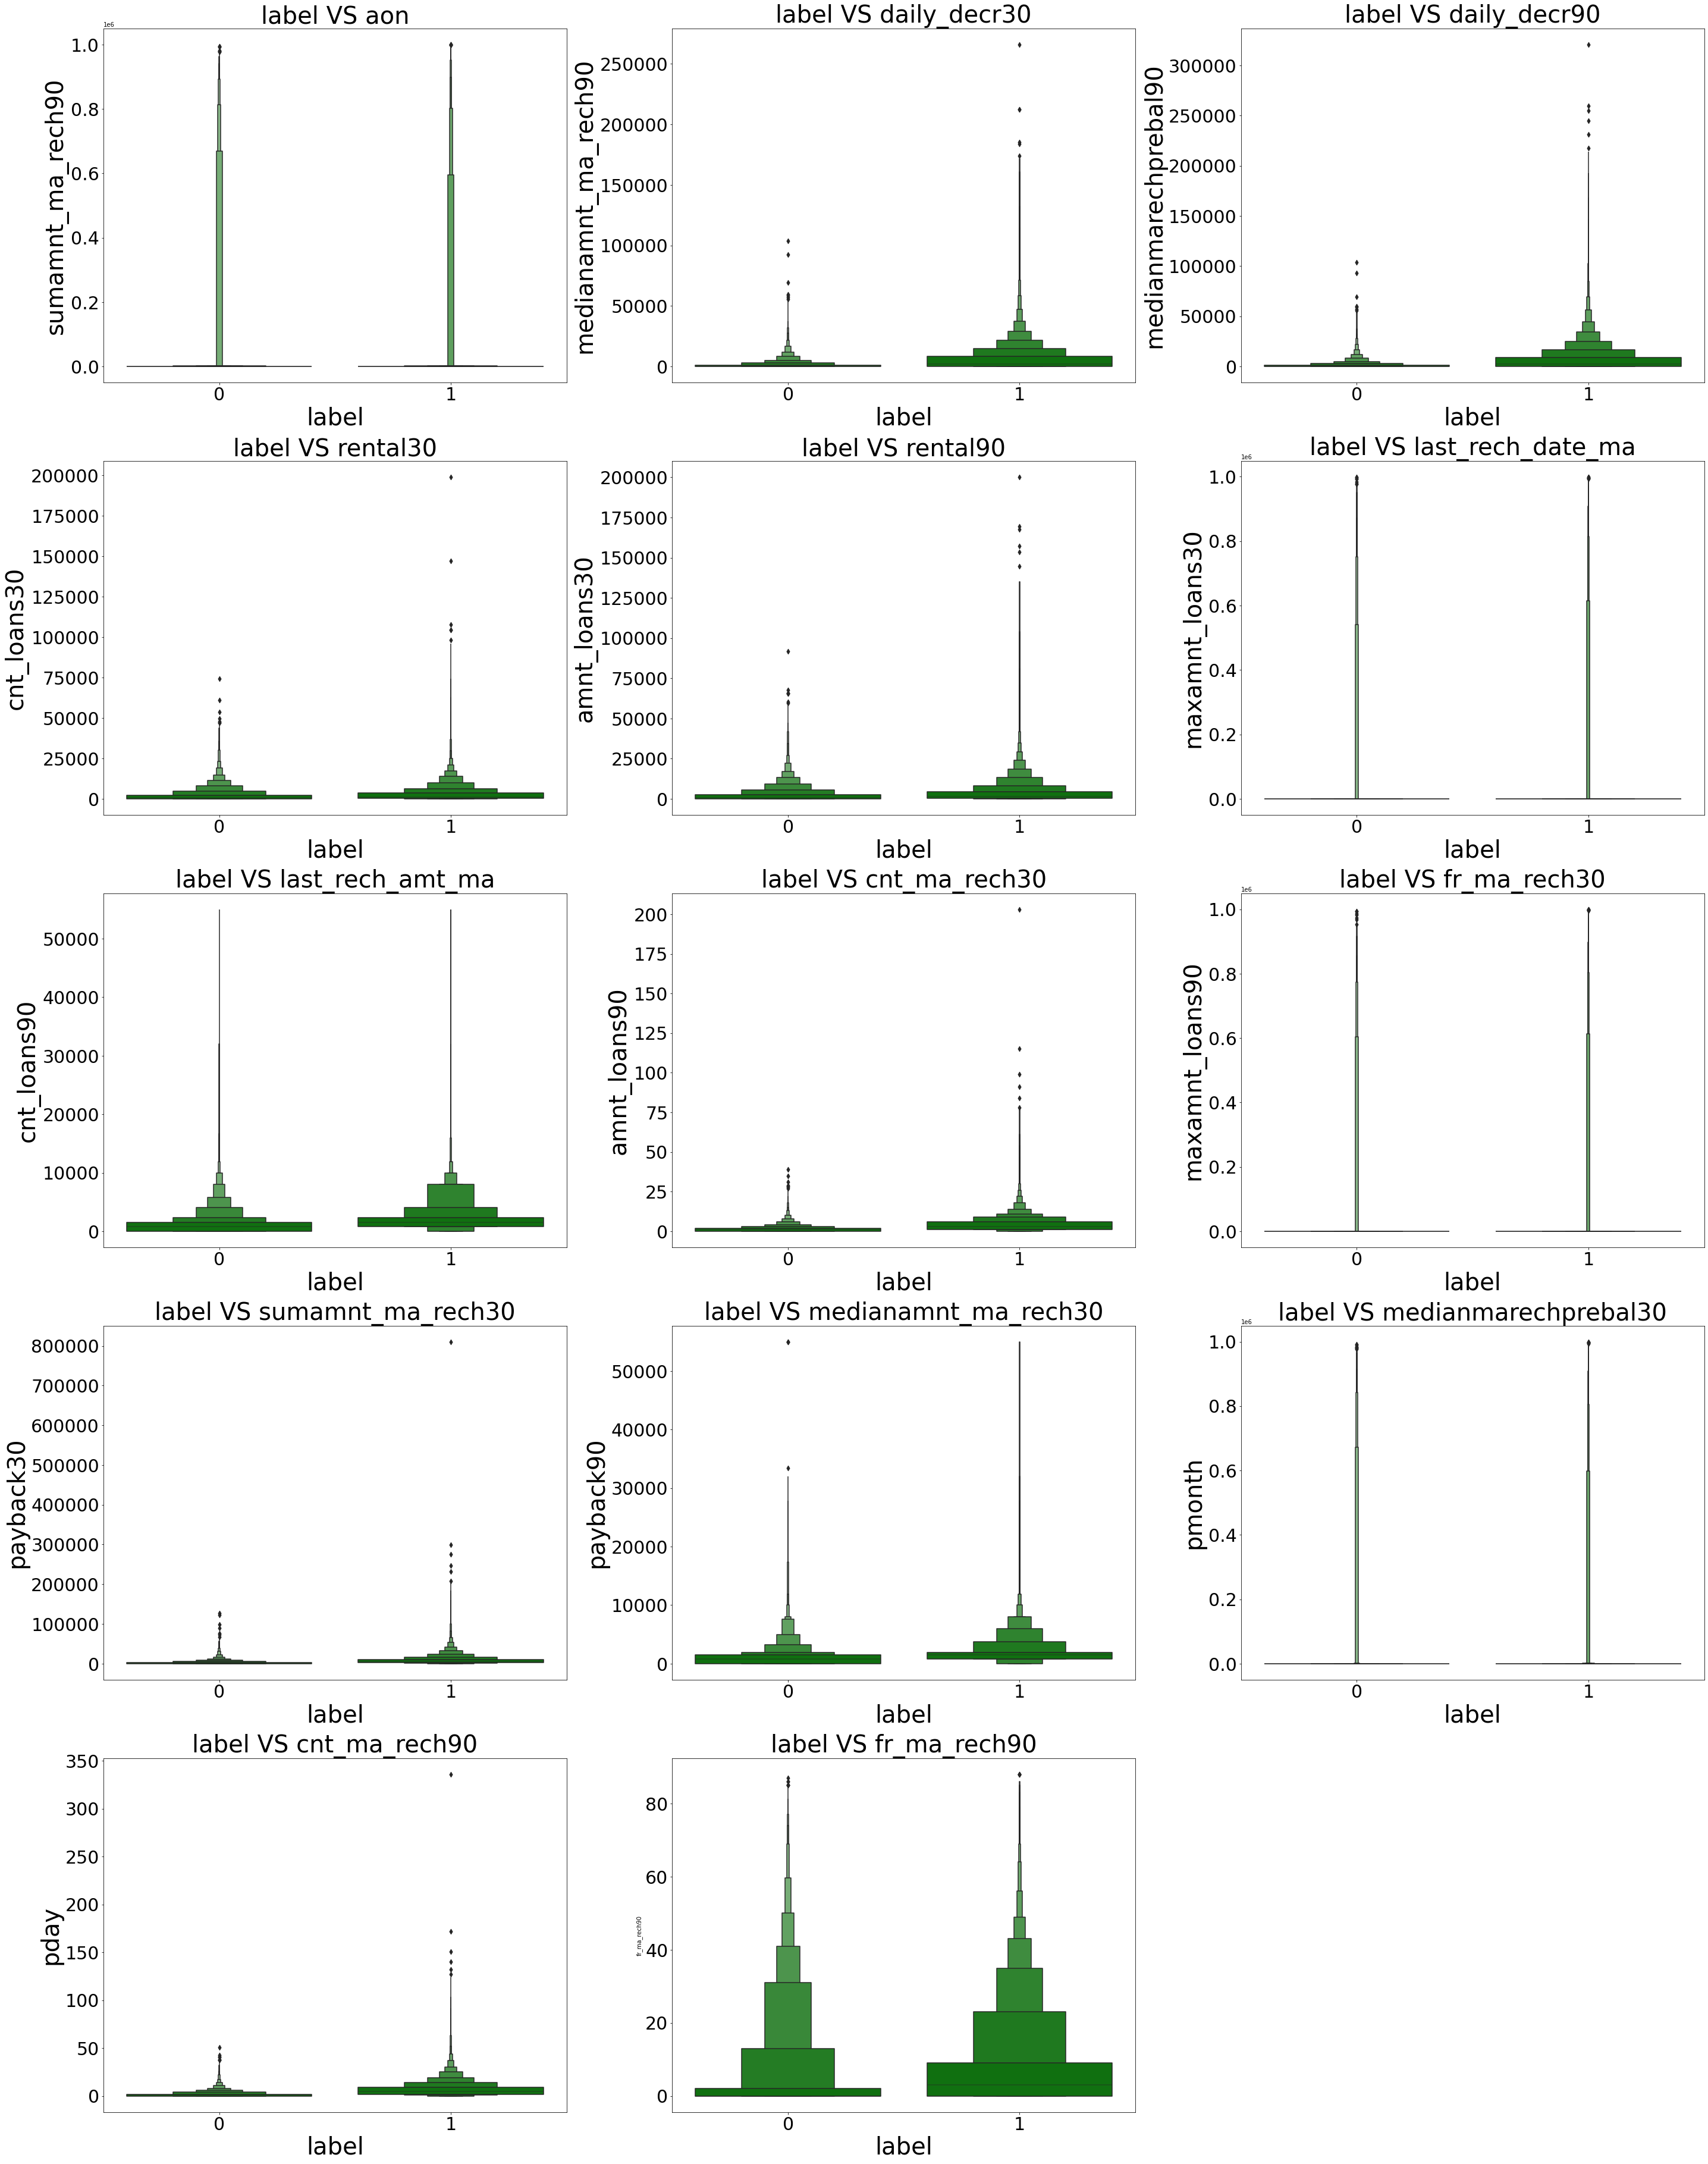

In [43]:
plt.figure(figsize=(40,100))
for i in range(len(num_cols1)):
    plt.subplot(10,3,i+1)
    sns.boxenplot(x=df['label'], y=df[num_cols1[i]], color="green")
    plt.title(f"label VS {num_cols[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(num_cols2[i],fontsize = 40)
    plt.tight_layout()

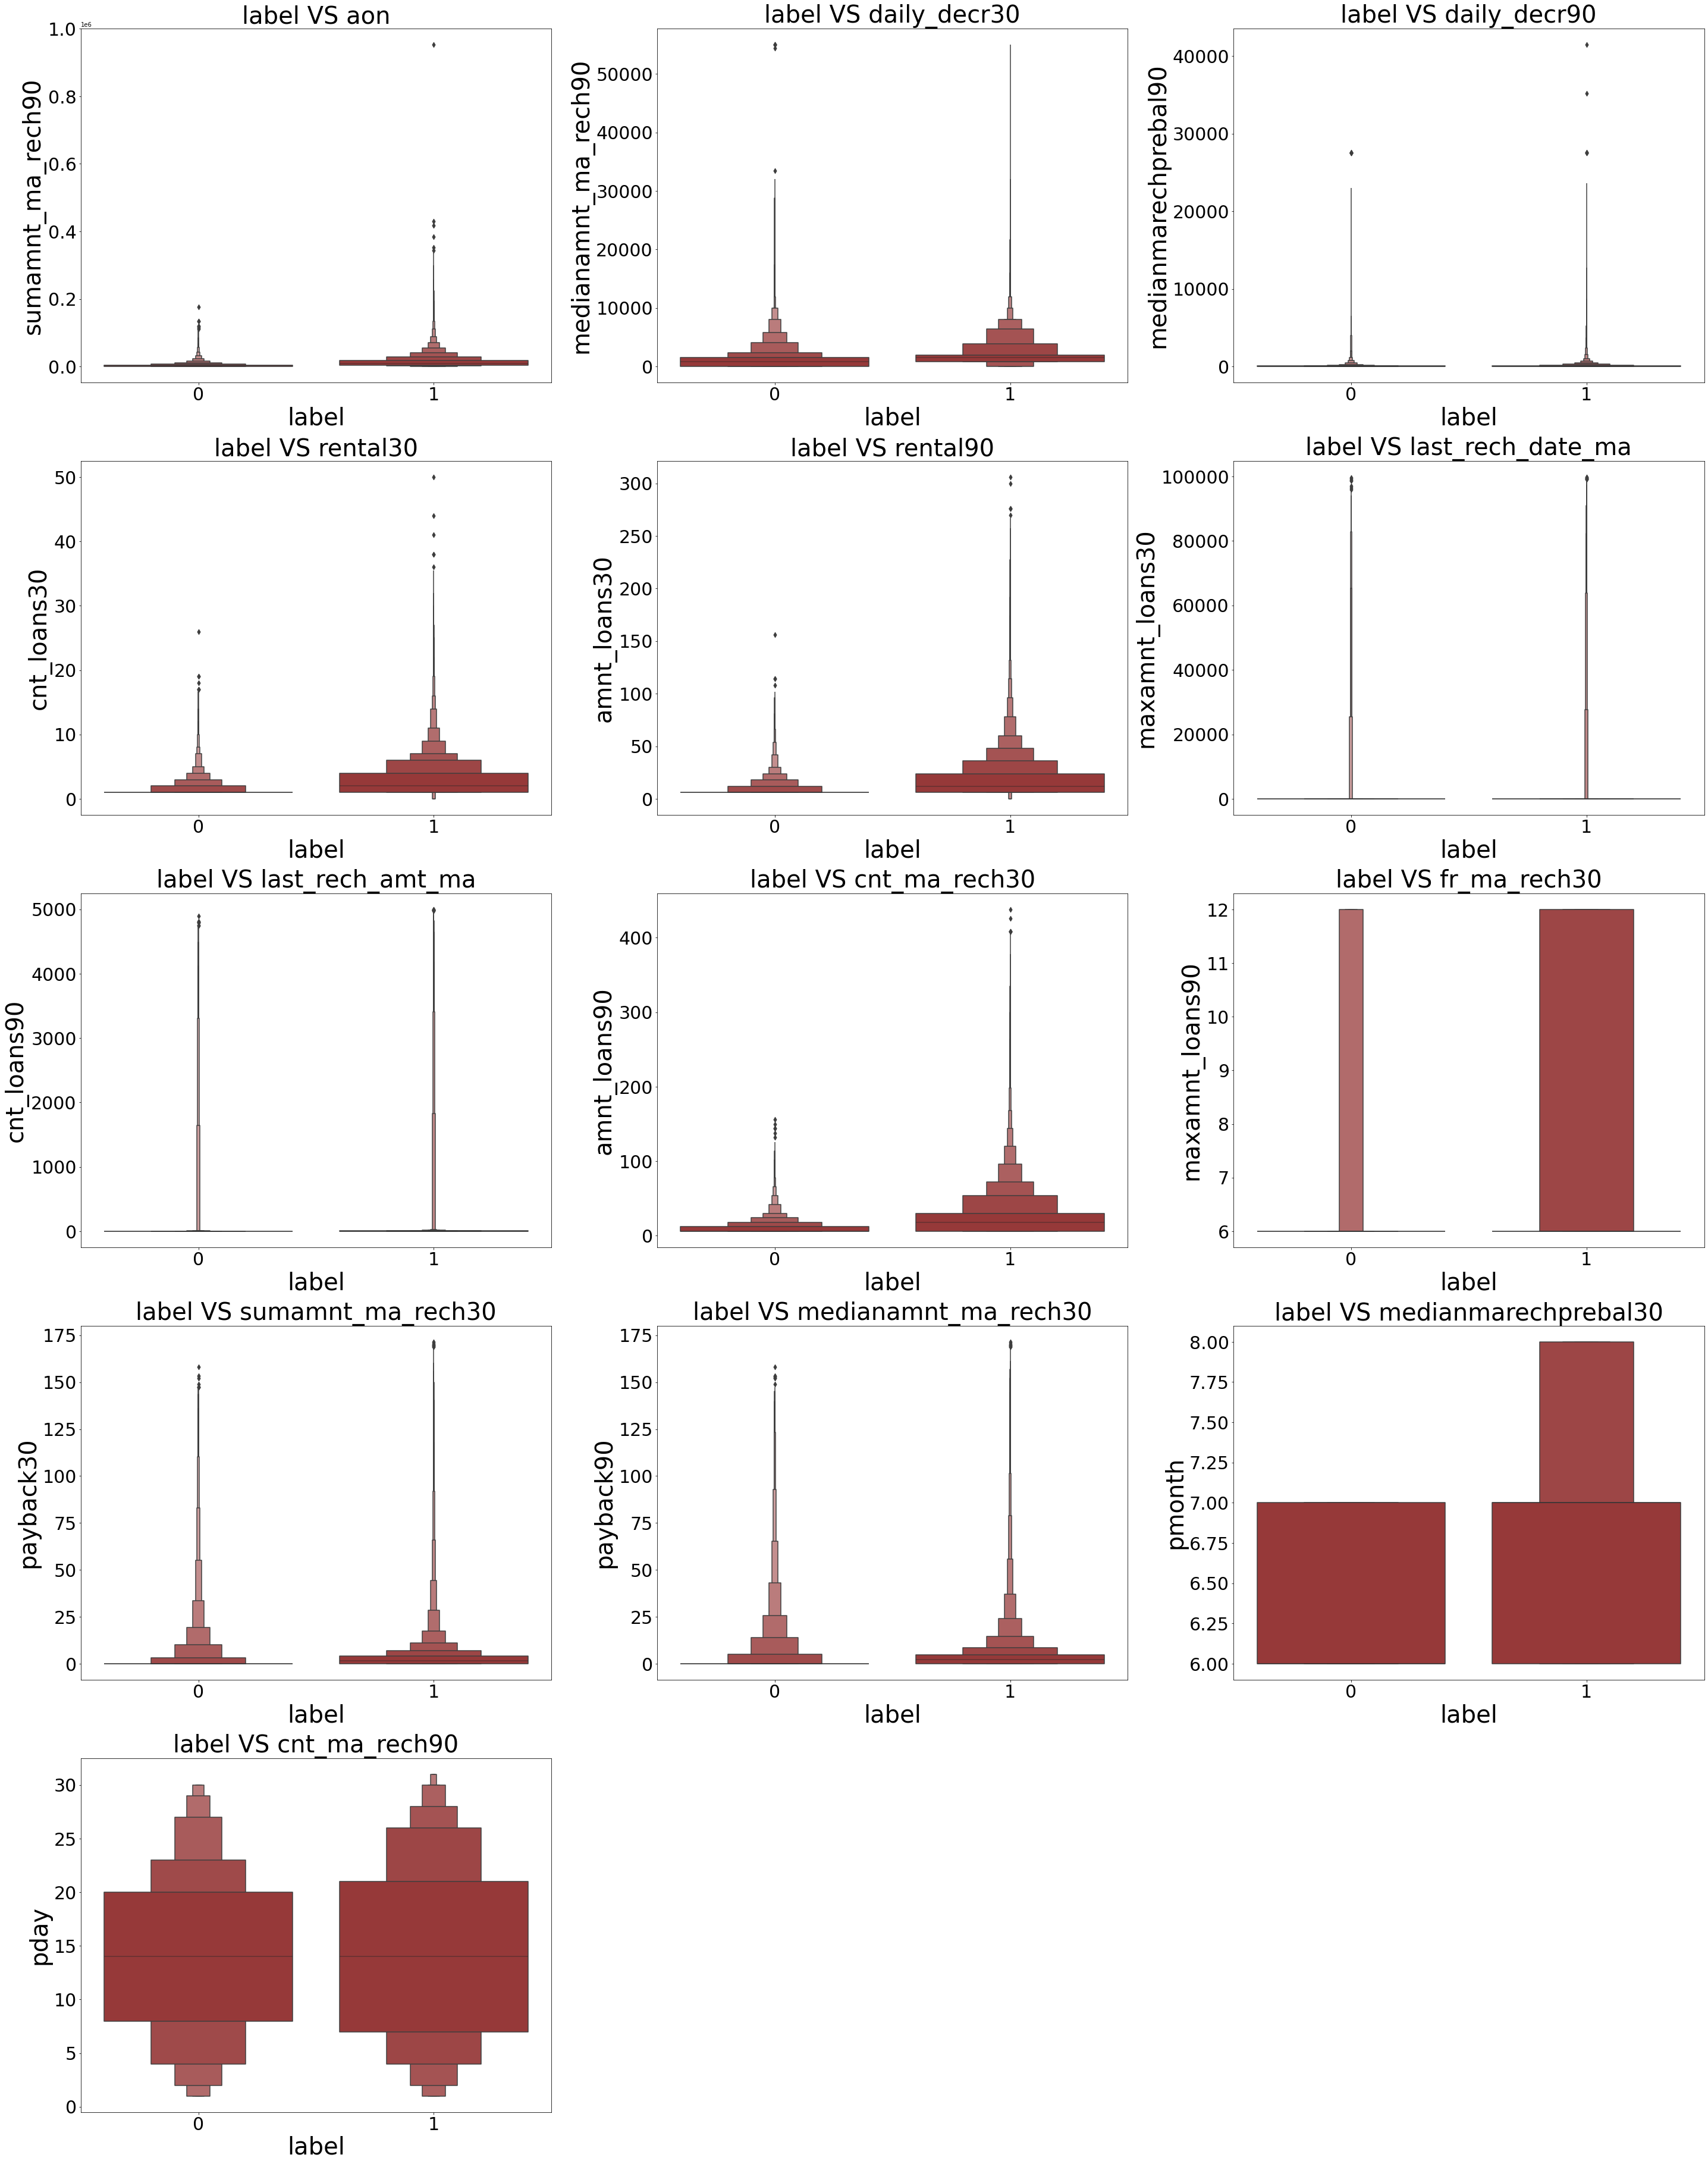

In [44]:
plt.figure(figsize=(40,100))
for i in range(len(num_cols2)):
    plt.subplot(10,3,i+1)
    sns.boxenplot(x=df['label'], y=df[num_cols2[i]], color="brown")
    plt.title(f"label VS {num_cols[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(num_cols2[i],fontsize = 40)
    plt.tight_layout()

•	There are no specific pattern of defaulter and non-defaulter.
•	As the max_amnt increases the number of defaulters decreases.
•	Number of defaulters are very less compared to non-defaulters in all columns.
•	A few columns show neutral pattern for both defaulter and non-defaulter.
•	Pmonth is distributed more between June and July and the defaulters are 0 after mid-july.


## 4. Data Cleaning

### 4.1 Outliers

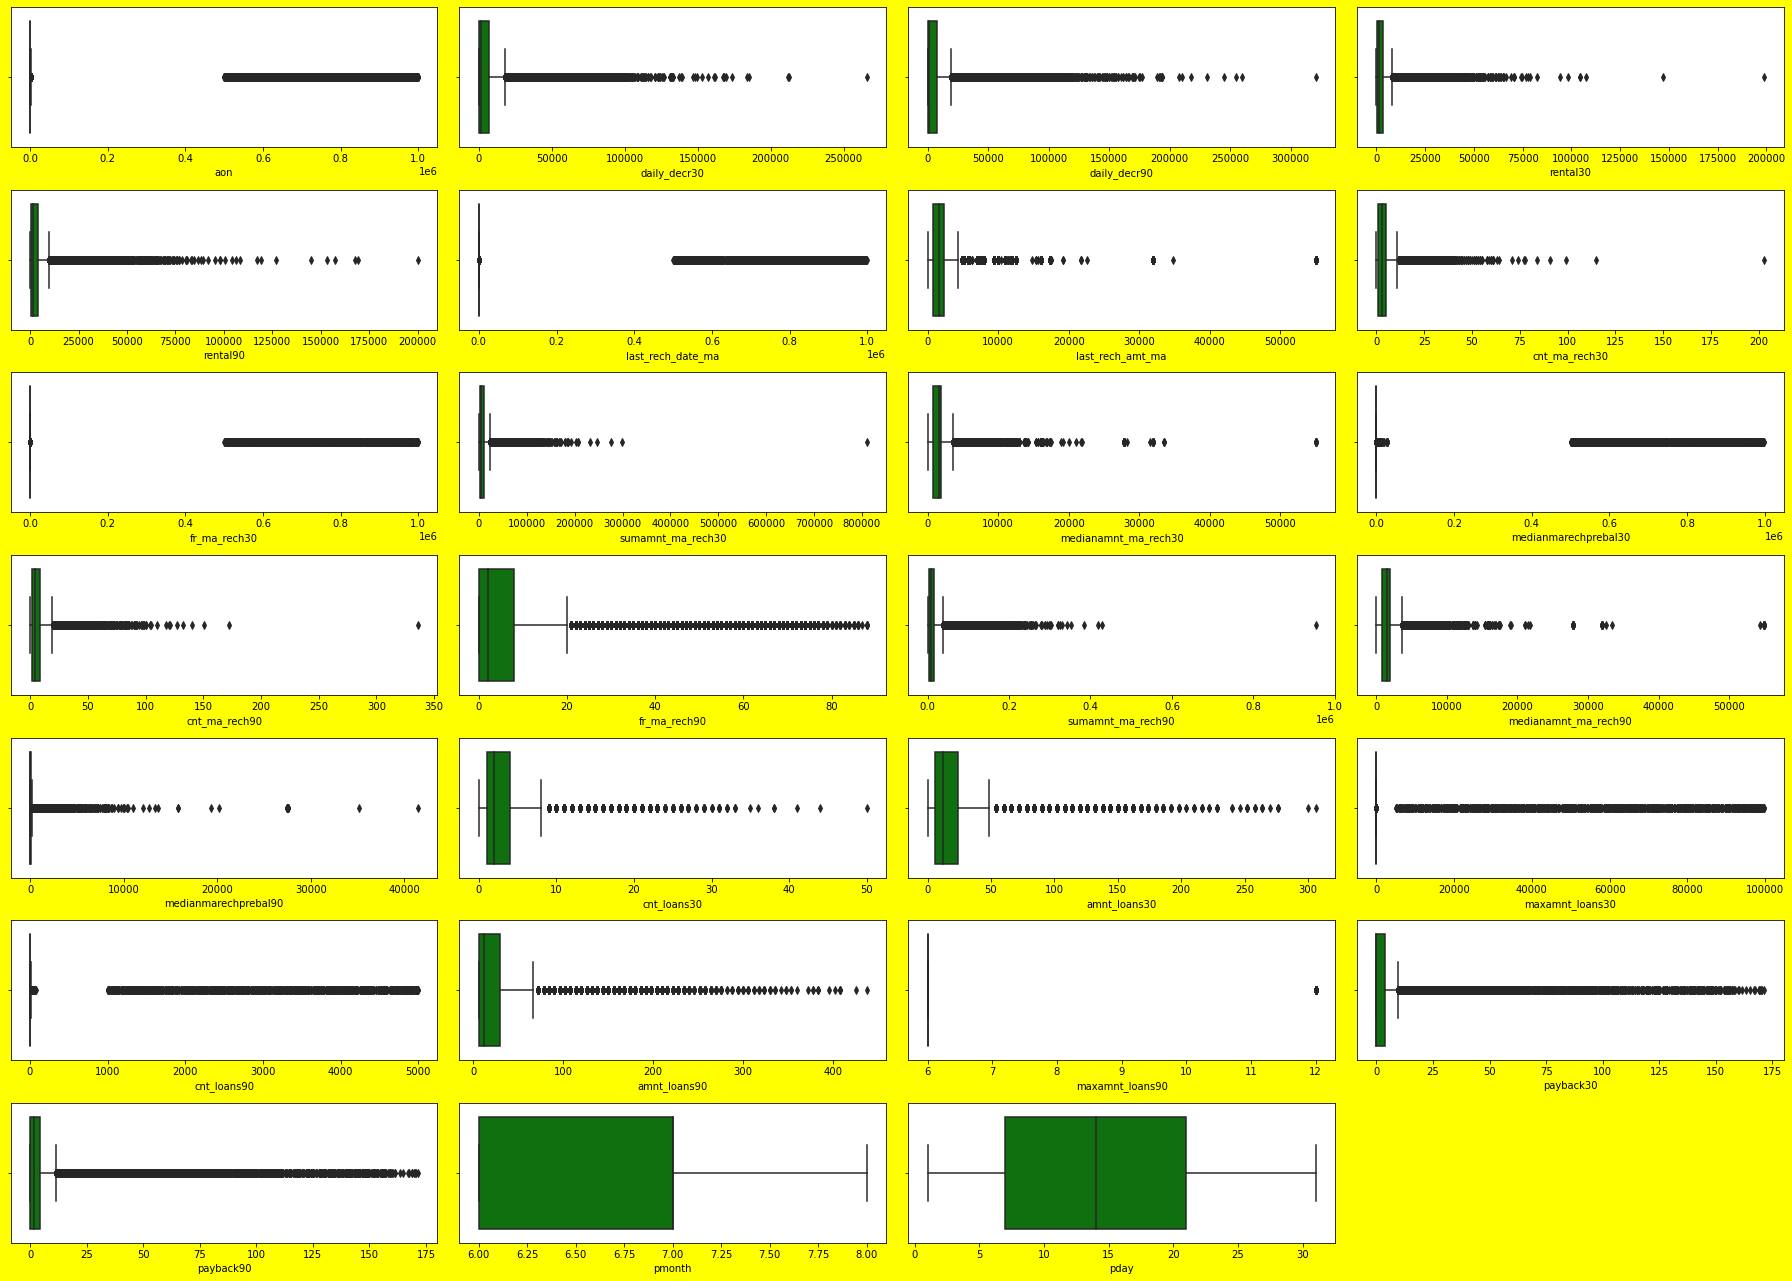

In [37]:
# Identifying the outliers 

plt.figure(figsize=(25,20),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(8,4,graph)

    sns.boxplot(df[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

#### Except pmonth and pday we have outliers in all columns.

### Z-Score Method

In [38]:
#Columns having outliers 

out_cols=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]

Above are the list of columns with outliers in the dataset.

In [39]:
from scipy.stats import zscore

z=np.abs(zscore(out_cols))
df_new=df[(z<3).all(axis=1)]
df_new

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,2,12,6.0,2.0,12,6,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,3,18,6.0,3.0,18,6,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,4,42,12.0,6.0,54,12,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,2,18,12.0,3.0,24,12,0.000000,10.500000,7,25


In [40]:
print('old data shape:',df.shape)
print('new data shape:',df_new.shape)

old data shape: (207550, 28)
new data shape: (171073, 28)


In [41]:
#checking the loss percentage

loss_percentage=(((207550-171073)/207550)*100)
loss_percentage

17.575042158516023

Here, The data loss percentage is too high. **As mentioned in the Problem statement we cannot accept this high loss percentage**. We will have to try other method of outlier removal

### IQR method:

In [42]:
# 1st quantile

Q1=out_cols.quantile(0.25)

# 3rd quantile

Q3=out_cols.quantile(0.75)

# IQR

IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of the dataset using IQR method.

In [43]:
#Checking shape of new dataset

df_1.shape

(78654, 28)

In my new dataset i have 78654 rows and 28 columns.

In [44]:
#Checking dataloss in IQR method of the dataset

Dataloss = (((207550-78654)/207550)*100)
Dataloss

62.103589496506864

In IQR method the data loss is more than 50% so let me have a look into percentile method to remove outliers.

### Percentile Method

In [45]:
#Removing outliers using percentile method

for column in out_cols:
    if df[column].dtypes != 'object':
        percentile = df[column].quantile([0.01,0.98]).values
        df[column][df[column]<=percentile[0]]=percentile[0]
        df[column][df[column]>=percentile[1]]=percentile[1]

I have successfully removed outliers in the dataset using percentile method.

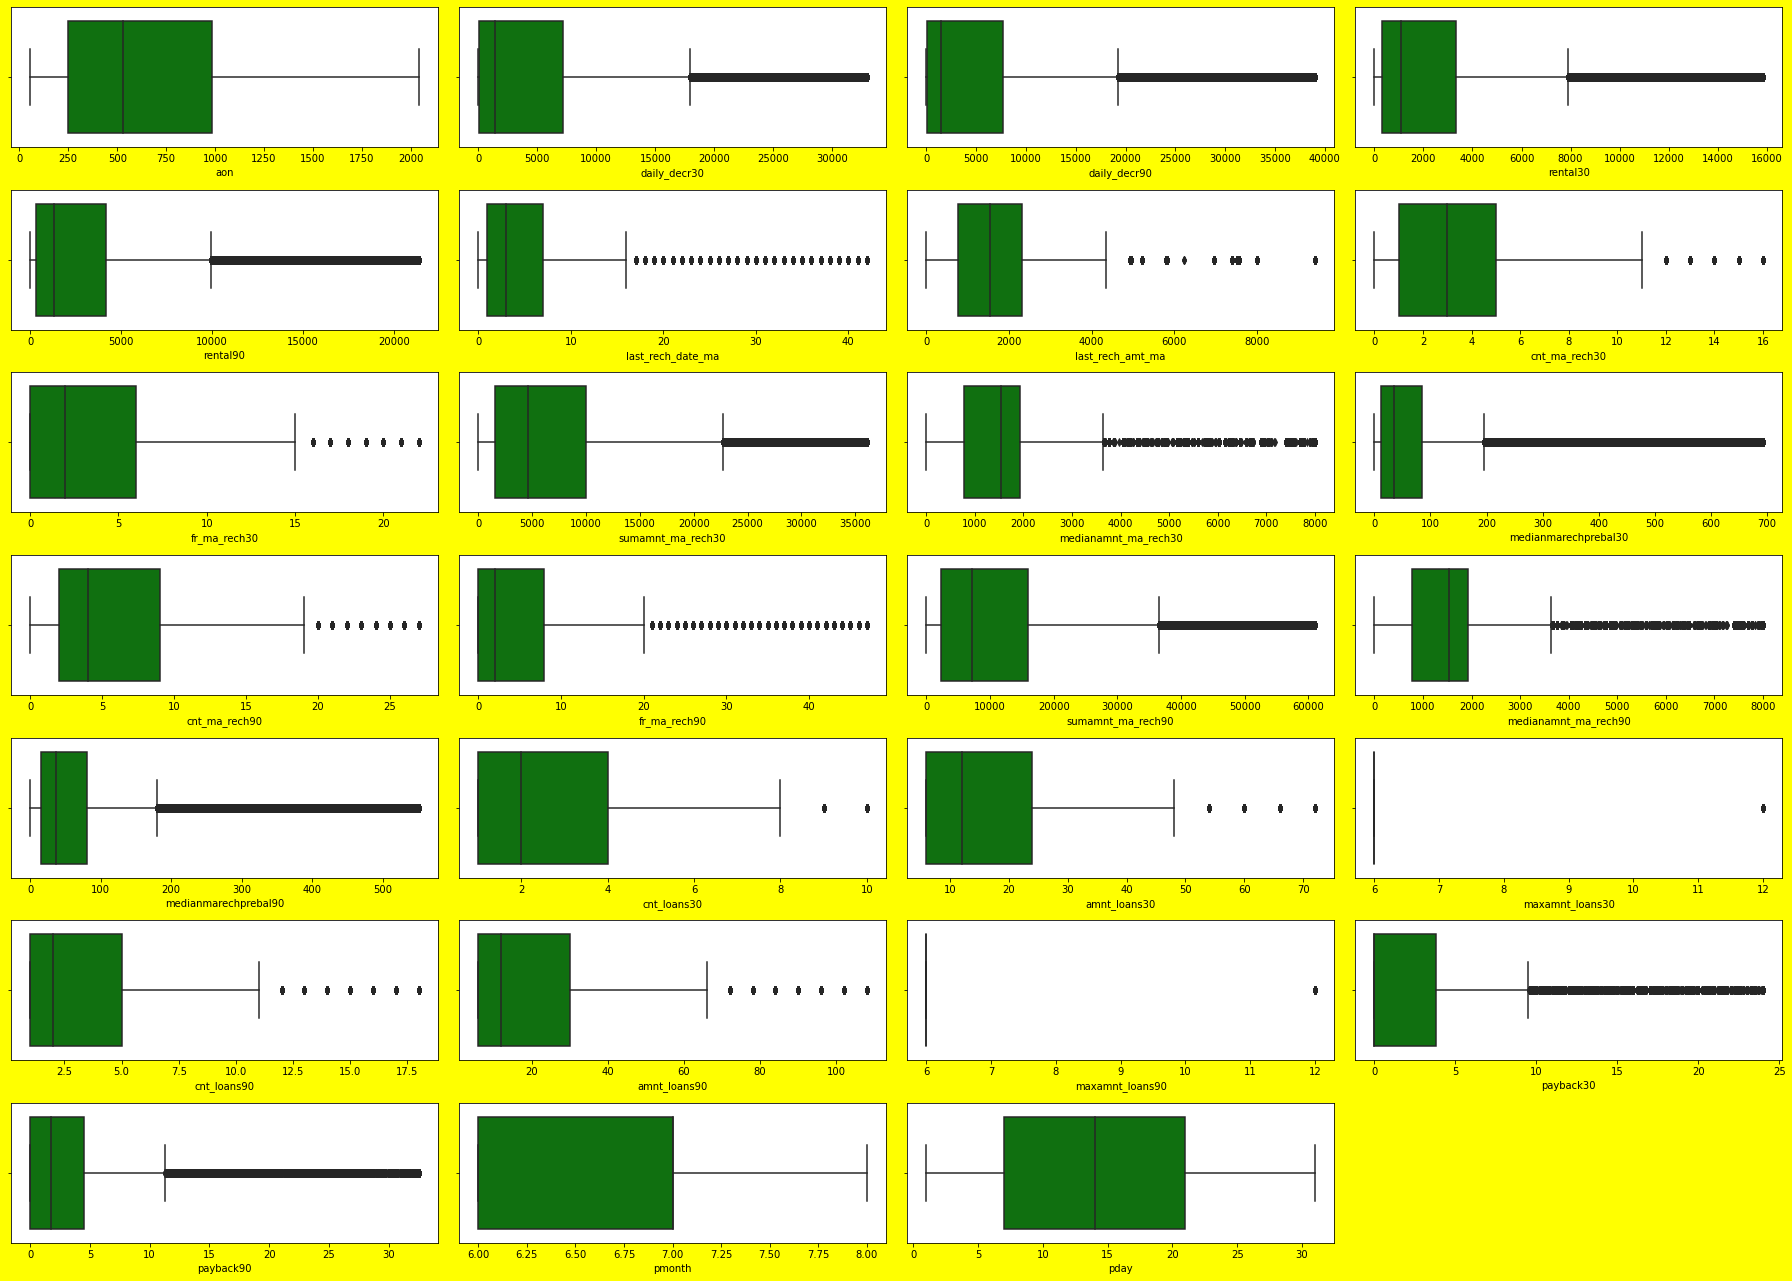

In [46]:
# Checking if the outliers is reduced or not

plt.figure(figsize=(25,20),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(8,4,graph)

    sns.boxplot(df[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

Outliers has reduced in all the columns.

### 4.2 Skewness

In [47]:
#Checking for skewness in the dataset

df.skew()

label                  -2.253346
aon                     0.934791
daily_decr30            1.978547
daily_decr90            2.098290
rental30                2.117210
rental90                2.205817
last_rech_date_ma       2.565623
last_rech_amt_ma        2.016661
cnt_ma_rech30           1.410702
fr_ma_rech30            1.703431
sumamnt_ma_rech30       1.749207
medianamnt_ma_rech30    2.122065
medianmarechprebal30    2.799234
cnt_ma_rech90           1.566573
fr_ma_rech90            1.987801
sumamnt_ma_rech90       1.863681
medianamnt_ma_rech90    2.143777
medianmarechprebal90    2.631175
cnt_loans30             1.597669
amnt_loans30            1.752260
maxamnt_loans30         2.190157
cnt_loans90             2.000454
amnt_loans90            1.910837
maxamnt_loans90         2.224471
payback30               2.635055
payback90               2.826565
pmonth                  0.358219
pday                    0.184762
dtype: float64

There is skewness in almost all columns except pmonth,pday and as label is my target i should not remove skewness from this column.

#### Removing skewness using yeo-johnson method:

In [48]:
#Creating a list of skewed features
skew_cols=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

#Using Power transformer to remove skewness in TotalCharges

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew_cols] = scaler.fit_transform(df[skew_cols].values)

In [49]:
#Checking skewness again

df[skew_cols].skew()

aon                    -0.059261
daily_decr30           -0.137650
daily_decr90           -0.127335
rental30               -0.062522
rental90               -0.062946
last_rech_date_ma       0.043916
last_rech_amt_ma       -0.106643
cnt_ma_rech30          -0.010536
fr_ma_rech30            0.131926
sumamnt_ma_rech30      -0.369147
medianamnt_ma_rech30   -0.237104
medianmarechprebal30   -0.046085
cnt_ma_rech90          -0.012334
fr_ma_rech90            0.141522
sumamnt_ma_rech90      -0.266852
medianamnt_ma_rech90   -0.101431
medianmarechprebal90   -0.029793
cnt_loans30             0.219771
amnt_loans30            0.146844
maxamnt_loans30         0.000000
cnt_loans90             0.201541
amnt_loans90            0.129122
maxamnt_loans90         0.000000
payback30               0.278283
payback90               0.193524
dtype: float64

#### Skewness in all the columns has been removed.

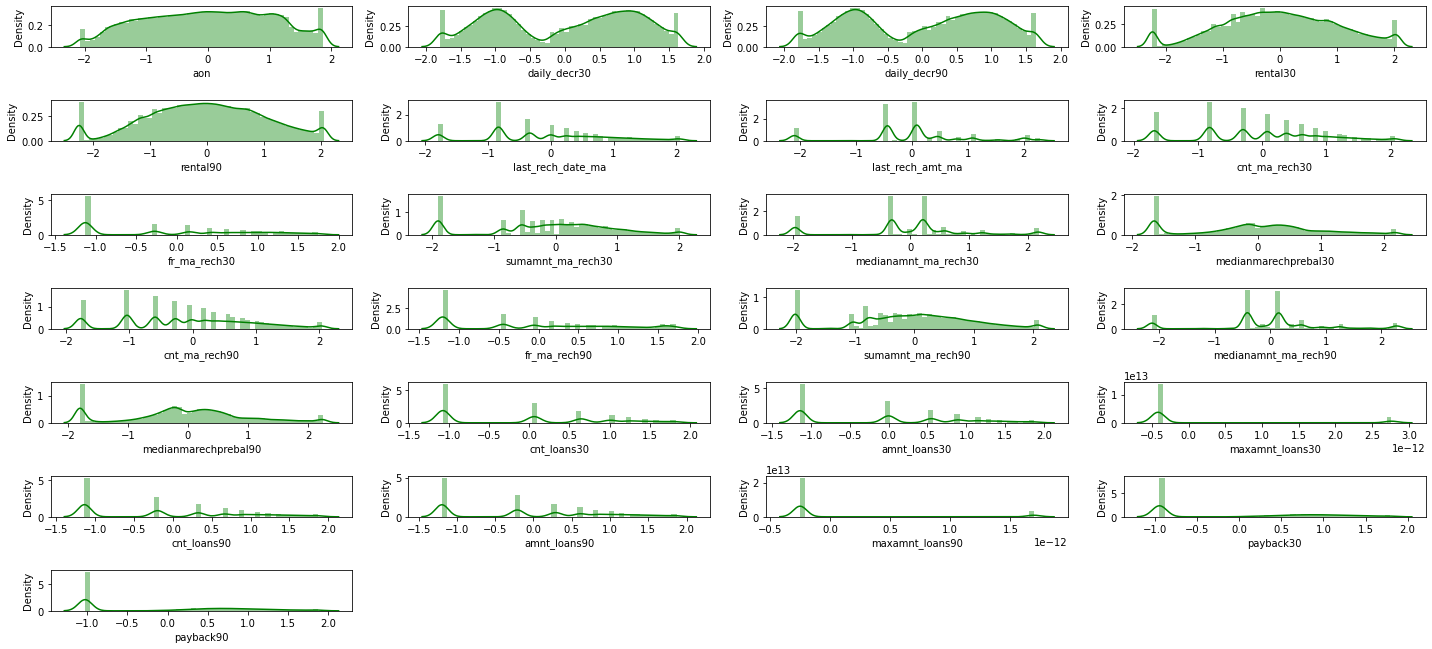

In [50]:
#plot for skewness check

plt.figure(figsize=(20,10))
graph=1 

for column in df[skew_cols]:

    plt.subplot(8,4,graph)

    sns.distplot(df[column],color='green')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

#### We can see that, all columns distribution has been changed from previous figure of distplot. The columns are now normal or symmetrical distribution

### 4.3 Correlation

In [51]:
#lets check the correlation

corr=df.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
label,1.000000,0.097208,0.266444,0.268775,0.142205,0.155661,0.064305,0.262083,0.347162,0.243564,0.361711,0.279565,0.266752,0.363878,0.221068,0.370102,0.252702,0.257523,0.276082,0.291492,0.097844,0.293548,0.309039,0.101247,0.236554,0.244596,0.151680,0.008241
aon,0.097208,1.000000,0.117096,0.117840,0.084111,0.092045,0.062278,0.097625,0.038139,0.070579,0.081316,0.097596,0.057144,0.059595,0.075794,0.098734,0.102863,0.057758,0.081993,0.087453,0.036202,0.116259,0.118862,0.038690,0.080812,0.111218,0.088821,0.016277
daily_decr30,0.266444,0.117096,1.000000,0.998435,0.585638,0.641529,0.123072,0.375006,0.498882,0.297504,0.556595,0.388856,0.274683,0.629258,0.219986,0.664160,0.364479,0.243450,0.398639,0.469091,0.394698,0.530528,0.585352,0.406822,0.336835,0.413587,0.819261,-0.005543
daily_decr90,0.268775,0.117840,0.998435,1.000000,0.586036,0.646414,0.126662,0.374533,0.494780,0.296841,0.551778,0.386170,0.273615,0.632905,0.221059,0.667208,0.364683,0.244228,0.394111,0.465628,0.397026,0.532191,0.587372,0.409956,0.334597,0.414701,0.832069,-0.012356
rental30,0.142205,0.084111,0.585638,0.586036,1.000000,0.974866,0.055640,0.284950,0.457289,0.248717,0.483215,0.321685,0.224043,0.513308,0.162761,0.520826,0.273283,0.180335,0.351445,0.391547,0.270246,0.426924,0.457818,0.279351,0.313625,0.349548,0.420241,0.104843
rental90,0.155661,0.092045,0.641529,0.646414,0.974866,1.000000,0.086931,0.294793,0.450131,0.251783,0.473789,0.314687,0.221703,0.541062,0.176180,0.546615,0.282589,0.189007,0.344863,0.391728,0.295450,0.447225,0.482003,0.306454,0.311970,0.368359,0.505436,0.088389
last_rech_date_ma,0.064305,0.062278,0.123072,0.126662,0.055640,0.086931,1.000000,0.518141,-0.016311,0.062349,0.120058,0.330315,0.193080,0.097029,0.220031,0.250383,0.507557,0.338033,-0.076541,-0.067983,0.014493,-0.027212,-0.022283,0.016073,-0.094731,-0.020555,0.070518,0.032959
last_rech_amt_ma,0.262083,0.097625,0.375006,0.374533,0.284950,0.294793,0.518141,1.000000,0.324761,0.274736,0.656182,0.815169,0.428939,0.375053,0.337799,0.702025,0.902231,0.490820,0.184620,0.221013,0.181203,0.216948,0.246442,0.185654,0.147133,0.184311,0.152274,0.060133
cnt_ma_rech30,0.347162,0.038139,0.498882,0.494780,0.457289,0.450131,-0.016311,0.324761,1.000000,0.416578,0.857169,0.414204,0.483347,0.921898,0.221113,0.780681,0.289736,0.390532,0.732750,0.738661,0.189267,0.710656,0.723829,0.194797,0.546307,0.488019,0.199803,0.097776
fr_ma_rech30,0.243564,0.070579,0.297504,0.296841,0.248717,0.251783,0.062349,0.274736,0.416578,1.000000,0.459433,0.381396,0.304847,0.409782,0.616698,0.422094,0.294093,0.225942,0.339864,0.349147,0.099354,0.351095,0.362987,0.102128,0.415946,0.394390,0.135763,0.081552


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

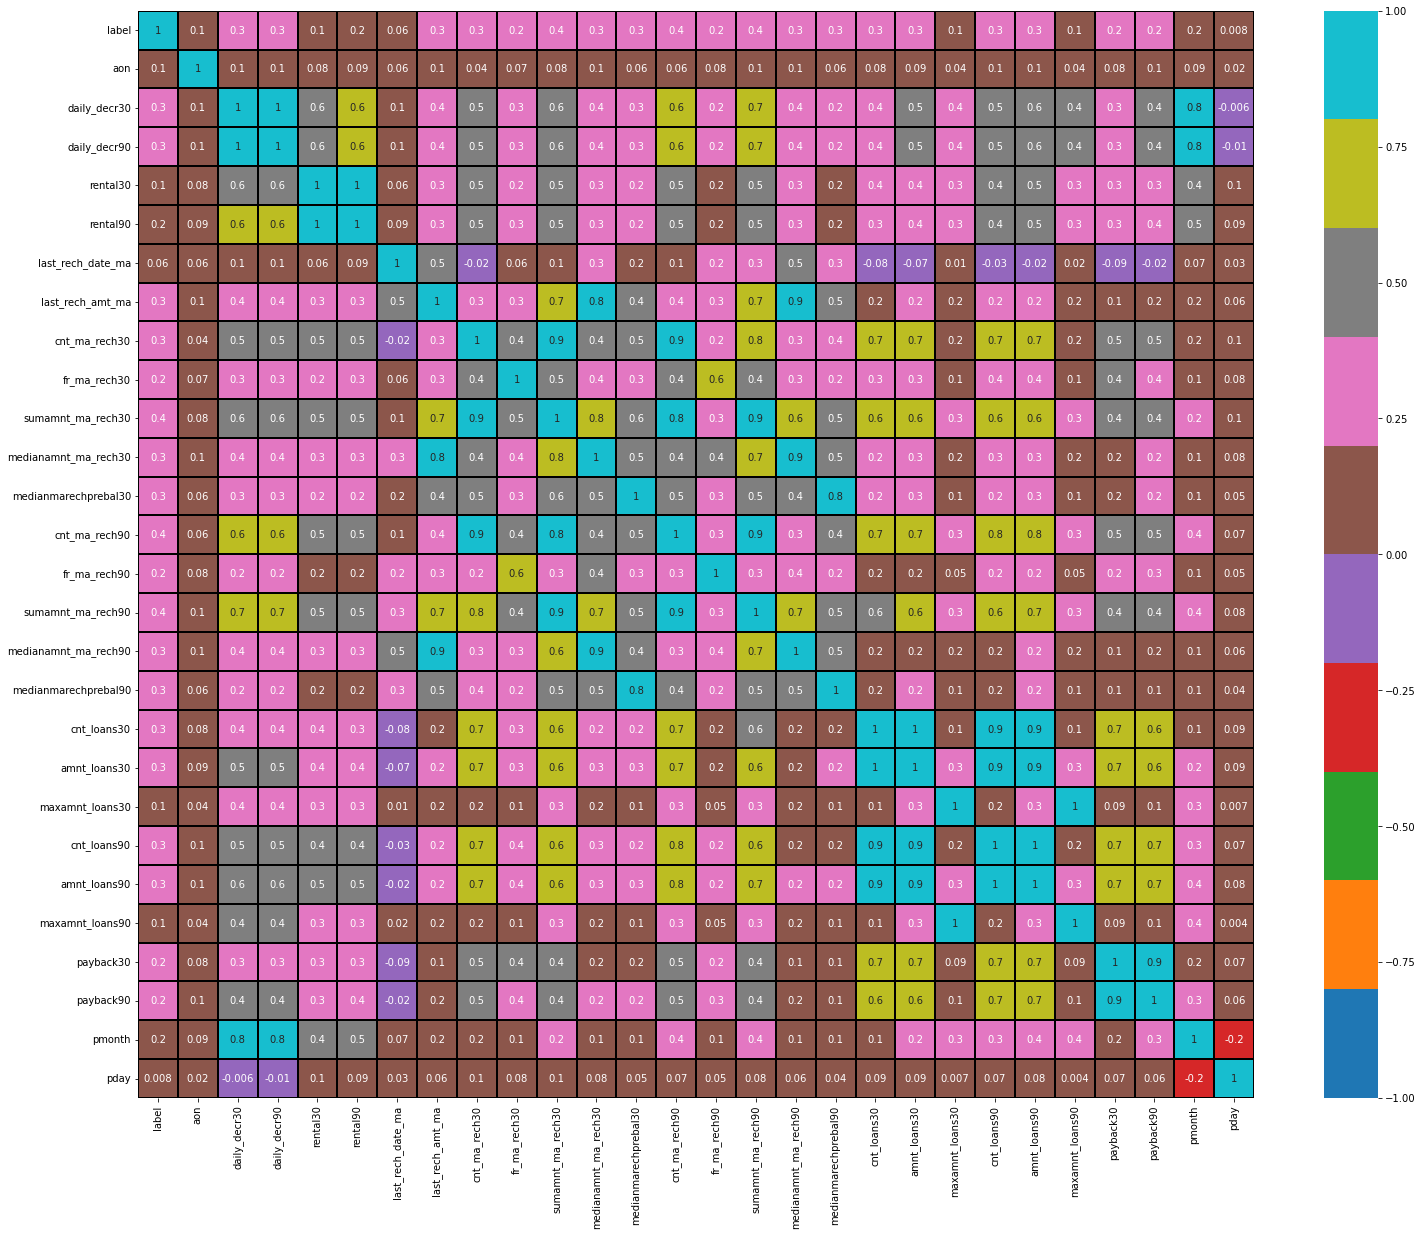

In [52]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="tab10")
plt.yticks(rotation=0);

**Observations:**

* We can see a few features with multicollinearity.
* Our target Label does not have a very high correlation with any of the columns.
* Most of the columns are correlated with target with less than 0.4 ratio
* cnt_loans30 and amnt_loans30 are highly corelated with each other.
* same way cnt_loans90 and amnt_loans90 are highly corelated with each other.
* payback30 and payback90 are also correlated.

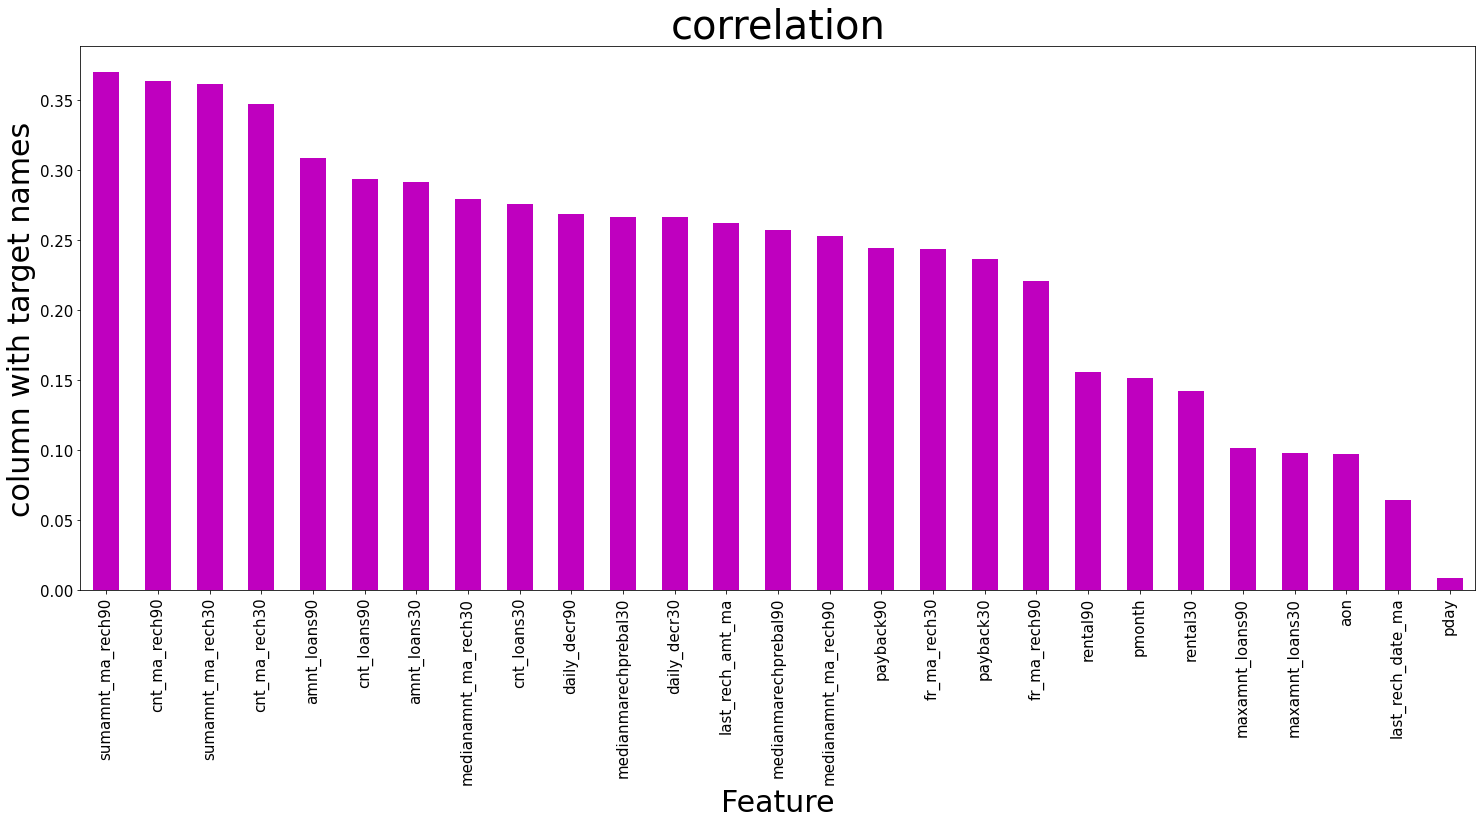

In [53]:
plt.figure(figsize=(25,10))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

* No negative correlation
* pday is least correlated.
* sumamnt_ma_rech90 is the highest correlated column.
* As mentioned above, all correlation are less than 40% with the target Label

## 4.4 Data Splitting

In [54]:
x = df.drop("label",axis=1)
y = df["label"]

I have separated my target and independent columns.

## 4.5 Standardization

In [55]:
#using Standard scaler to normalize the data

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using MinMax scaler.

In [56]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0.348970,0.670388,0.661447,0.330465,0.335513,0.378383,0.498865,0.368297,0.990879,0.435328,0.523791,0.239198,0.307937,0.870329,0.378257,0.515526,0.231859,0.392540,0.378664,0.0,0.312710,0.321358,0.0,1.000000,0.984592,0.5,0.633333
1,0.625204,0.851665,0.834288,0.706042,0.668524,0.865622,0.831756,0.229617,0.000000,0.540837,0.881977,0.529616,0.191924,0.000000,0.466745,0.879174,0.533388,0.000000,0.378664,1.0,0.000000,0.321358,1.0,0.000000,0.000000,1.0,0.300000
2,0.537141,0.578404,0.572448,0.491889,0.470866,0.463708,0.498865,0.229617,0.000000,0.341592,0.523791,0.543230,0.191924,0.000000,0.298987,0.515526,0.547997,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.600000
3,0.318099,0.196647,0.198199,0.299475,0.290305,0.995905,0.411921,0.000000,0.000000,0.000000,0.000000,0.000000,0.191924,0.000000,0.252713,0.422273,0.125813,0.392540,0.378664,0.0,0.312710,0.321358,0.0,0.000000,0.000000,0.0,0.166667
4,0.718606,0.353656,0.353543,0.518649,0.495734,0.526388,0.584318,0.717633,0.448169,0.822222,0.615344,0.414665,0.636788,0.391346,0.736845,0.665467,0.440867,0.910035,0.859875,0.0,0.784192,0.767230,0.0,0.574148,0.497077,0.0,0.700000


This is the data of independent variables after scaling.

## 4.6 SMOTE Technique

In [57]:
#Checking the value count of target column

y.value_counts()

1    181388
0     26162
Name: label, dtype: int64

In [58]:
#Importing SMOTE and using it to balance

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [59]:
# Checking the value counts again

y.value_counts()

0    181388
1    181388
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

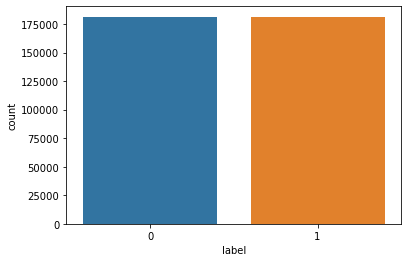

In [60]:
# Visualizing the target data after oversampling

sns.countplot(y)

Now the data looks beautifully balanced.

# BUILDING THE MODEL

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix,precision_score, f1_score, accuracy_score, classification_report

## 1. Decision Tree Classifier

In [86]:
#Finding the best Randomstate:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.9156781490908088  on Random_state  69


In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =69)

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.9157700329863185
[[50433  4185]
 [ 4982 49233]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     54618
           1       0.92      0.91      0.91     54215

    accuracy                           0.92    108833
   macro avg       0.92      0.92      0.92    108833
weighted avg       0.92      0.92      0.92    108833



In [91]:
#HyperParameter Tuning for DTC

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

dtc= DecisionTreeClassifier()
dt_grid_param={'criterion':['gini','entropy'],
             'max_depth':np.arange(0,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30],'min_samples_leaf': [5, 10, 20, 50, 100]}

gd_sr=GridSearchCV(estimator=dtc,param_grid=dt_grid_param,scoring='accuracy',cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(gd_sr)
print(gd_sr.best_score_)
print(gd_sr.best_estimator_)
print(gd_sr.best_params_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')
0.8224386995394554
DecisionTreeClassifier(max_depth=24, max_features='auto', max_leaf_nodes=30,
                       min_samples_leaf=20)
{'criterion': 'gini', 'max_depth': 24, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_samples_leaf': 20}


In [92]:
#Reinstating the tuned parameters:

dtc_H=DecisionTreeClassifier(criterion='gini',max_depth=24,max_features='auto',
                           max_leaf_nodes=30, min_samples_leaf=20)
dtc_H.fit(x_train,y_train)
dtc_H.score(x_train,y_train)
preddtc=dtc_H.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8086334108220852
[[43209 11409]
 [ 9418 44797]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81     54618
           1       0.80      0.83      0.81     54215

    accuracy                           0.81    108833
   macro avg       0.81      0.81      0.81    108833
weighted avg       0.81      0.81      0.81    108833



#### MY SCORE IS REDUCED.

In [75]:
score=cross_val_score(dtc,x,y,cv=5)
score_b=score.mean()
print("Cross_Val_Score of DTC:",score_b)

Cross_Val_Score of DTC: 0.9114579768543536


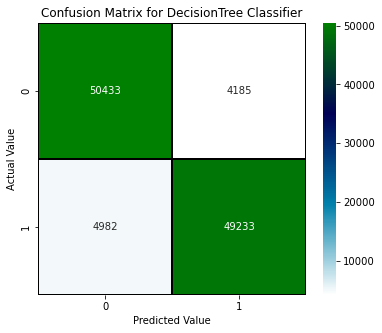

In [76]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_dtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean_r", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

We have more false negative than false positive

## 2. Random Forest Classifier

In [62]:
#Finding the best random state

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.9534975604825742  on Random_state  65


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =65)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9526981705916404
[[52173  2304]
 [ 2844 51512]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     54477
           1       0.96      0.95      0.95     54356

    accuracy                           0.95    108833
   macro avg       0.95      0.95      0.95    108833
weighted avg       0.95      0.95      0.95    108833



In [64]:
score=cross_val_score(rf,x,y,cv=5)
score_d=score.mean()
print("Cross_Val_Score of RF:",score_d)

Cross_Val_Score of RF: 0.9492939788403951


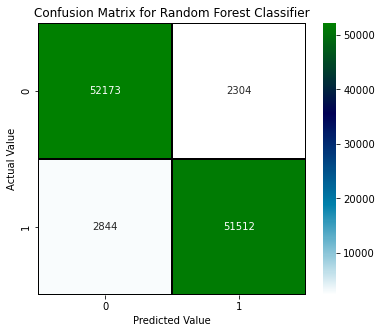

In [65]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean_r", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## 3. KNN Classifier

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =65)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

0.8999660029586615
[[53991   486]
 [10401 43955]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     54477
           1       0.99      0.81      0.89     54356

    accuracy                           0.90    108833
   macro avg       0.91      0.90      0.90    108833
weighted avg       0.91      0.90      0.90    108833



In [67]:
score=cross_val_score(knn,x,y,cv=5)
score_e=score.mean()
print("Cross_Val_Score of KNN:",score_e)

Cross_Val_Score of KNN: 0.9040675288719932


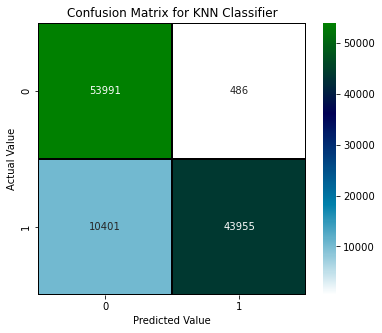

In [68]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_knn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean_r", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## 4. XGB Classifier

In [70]:
from xgboost import XGBClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =41)

# Checking accuracy for XGBClassifier
XGB=XGBClassifier(verbosity=0)
XGB.fit(x_train,y_train)

# Prediction
predxgb = XGB.predict(x_test)

print(accuracy_score(y_test, predxgb))
print(confusion_matrix(y_test, predxgb))
print(classification_report(y_test,predxgb))

0.9495006110279052
[[51104  3317]
 [ 2179 52233]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     54421
           1       0.94      0.96      0.95     54412

    accuracy                           0.95    108833
   macro avg       0.95      0.95      0.95    108833
weighted avg       0.95      0.95      0.95    108833



In [71]:
score=cross_val_score(XGB,x,y,cv=5)
score_g=score.mean()
print("Cross_Val_Score of XGB Classifier:",score_g)

Cross_Val_Score of XGB Classifier: 0.9363688597735809


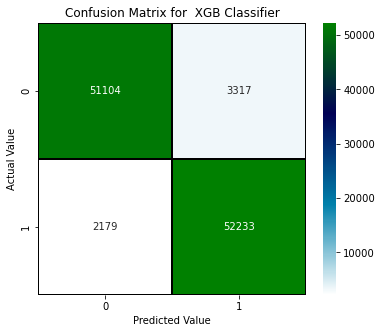

In [72]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(y_test,predxgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

Text(0.5, 1.0, 'Cross Validation Scores')

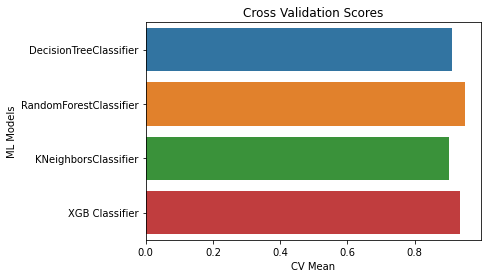

In [77]:
cv_result=[score_b,score_d,score_e,score_g]
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", 
                                                                            "RandomForestClassifier",
                                                                            "KNeighborsClassifier",
                                                                            "XGB Classifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("CV Mean")
g.set_title("Cross Validation Scores")

### Random forest is the best

Text(0.5, 1.0, 'Accuracy scores of different Models')

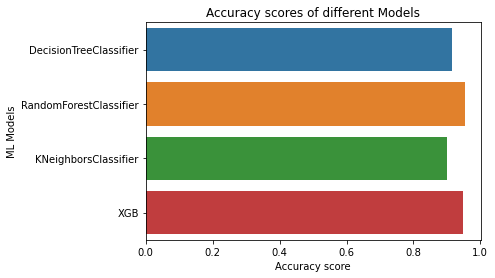

In [78]:
score_dtc=0.9155587000266463
score_rf=0.9531667784587395
score_knn=0.8999660029586615
score_xgb=0.9495006110279052

acc_result=[score_dtc,score_rf,score_knn,score_xgb]
acc_results = pd.DataFrame({"Accuracy Scores":acc_result, "ML Models":[ "DecisionTreeClassifier", 
                                                                       "RandomForestClassifier",
                                                                       "KNeighborsClassifier","XGB"]})

g = sns.barplot("Accuracy Scores", "ML Models", data = acc_results)
g.set_xlabel("Accuracy score")
g.set_title("Accuracy scores of different Models")

### Random Forest is the best

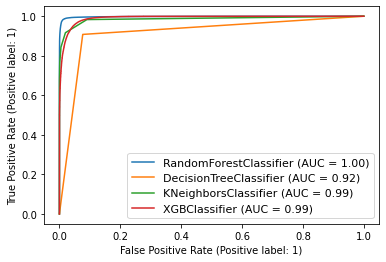

In [79]:
# Plotting AUC-ROC Curve for all the models used here 

from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf,x_test,y_test)   
plot_roc_curve(dtc,x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

### From all above 3 plots we can clearly see that random forest is the best model.

## HyperParameter Tuning for Random Forest Model

In [ ]:
#Hyper Parameter Tuning for Random Forest

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=65)

rf=RandomForestClassifier()
rf_grid_param={"max_features": [1,3,10],
                "min_samples_split":[2,3,5,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,200,300],
                "criterion":["gini",'entropy']}

gd_sr=GridSearchCV(estimator=rf,param_grid=rf_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

# Final Model 

In [81]:
#Final model as Random Forest
#{'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =81)

Final_Model=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='gini',
                         max_features=1,min_samples_leaf=1,min_samples_split=3)
Final_Model.fit(x_train,y_train)
predrf=Final_Model.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9559876140508853
[[52242  2491]
 [ 2299 51801]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     54733
           1       0.95      0.96      0.96     54100

    accuracy                           0.96    108833
   macro avg       0.96      0.96      0.96    108833
weighted avg       0.96      0.96      0.96    108833



#### Our score is improved a little.

# AUC_ROC Curve

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob=Final_Model.predict_proba(x_test)[:,1]
y_pred_prob

array([8.56666667e-01, 9.81666667e-01, 5.25175830e-02, ...,
       9.18879376e-04, 8.76666667e-01, 0.00000000e+00])

In [83]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [84]:
fpr

array([0.        , 0.        , 0.        , ..., 0.88504193, 0.88560832,
       1.        ])

In [85]:
tpr

array([0.        , 0.02743068, 0.03831793, ..., 0.99987061, 0.99987061,
       1.        ])

In [86]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.98333333e-01, ...,
       1.29258801e-04, 6.39052561e-05, 0.00000000e+00])

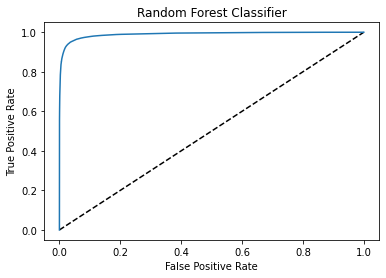

In [87]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [88]:
auc_score=roc_auc_score(y_test,Final_Model.predict(x_test))
print((auc_score)*100)

95.59963863221333


# Saving the Model

In [89]:
import joblib
joblib.dump(Final_Model,'Micro Credit RF Model.pkl')

['Micro Credit RF Model.pkl']

<AxesSubplot:>

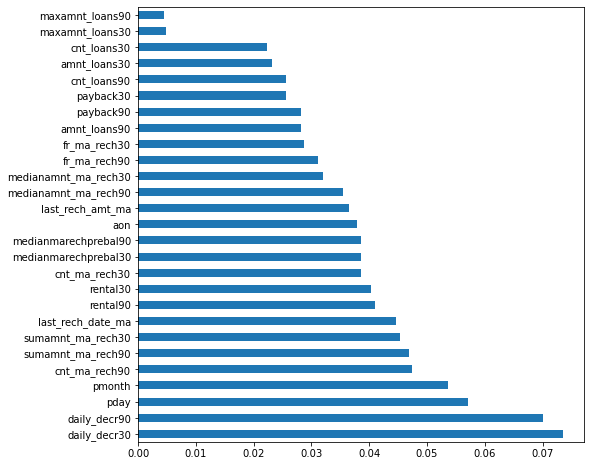

In [90]:
#Checking Feature Importance with Random Forest Model

feat_importances = pd.Series(Final_Model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(8,8))

#### As per our feature Importance plot, daily_decr30, daily decr90,pday are important features.

# Predictions

In [91]:
# Loading the saved model
model=joblib.load("Micro Credit RF Model.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 0, ..., 0, 1, 0])

In [92]:
#saving as dataframe

base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = prediction
base

,actual,predictions
163460,1,1
8928,1,1
248038,0,0
137081,0,0
310285,0,0
...,...,...
245188,0,0
168885,1,1
219511,0,0
189838,1,1


In [93]:
#Adding another column of thier difference. 

base['difference']=base['actual']-base['predictions']

#If 0 then actual and predicted are same. else its different

print(base['difference'].value_counts())

 0    104043
-1      2491
 1      2299
Name: difference, dtype: int64


In [94]:
a=(4790/104043)*100
a

4.603865709370164

## As per our Model, only 4% of the result is wrong and rest all are true values.

# Done!